# Imports

In [1]:
# Data Analysis
import numpy as np
import pandas as pd

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Preprocessing
from sklearn.preprocessing import StandardScaler
from scipy import stats

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# Options

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.expand_frame_repr', True)

sns.set_palette('Set1')
sns.set_style("white")

# Acquiring Data

In [3]:
train_df = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
test_df = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

# Analysis

In [4]:
print(train_df.columns.values)

['Id' 'MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'Alley'
 'LotShape' 'LandContour' 'Utilities' 'LotConfig' 'LandSlope'
 'Neighborhood' 'Condition1' 'Condition2' 'BldgType' 'HouseStyle'
 'OverallQual' 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofStyle'
 'RoofMatl' 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'MasVnrArea'
 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' '1stFlrSF'
 '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath'
 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual'
 'TotRmsAbvGrd' 'Functional' 'Fireplaces' 'FireplaceQu' 'GarageType'
 'GarageYrBlt' 'GarageFinish' 'GarageCars' 'GarageArea' 'GarageQual'
 'GarageCond' 'PavedDrive' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'PoolQC' 'Fence' 'MiscFeature'
 'MiscVal' 'MoSold' 'YrSold' 'SaleTy

In [5]:
print('train shape: {}'.format(train_df.shape) + '\n' + 'test shape: {}'.format(test_df.shape))

train shape: (1460, 81)
test shape: (1459, 80)


In [6]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
print('Training dataset has {} duplicated records'.format(train_df.duplicated().sum()))
print('Test dataset has {} duplicated records'.format(test_df.duplicated().sum()))

Training dataset has 0 duplicated records
Test dataset has 0 duplicated records


In [8]:
def null_report(df):
    result = pd.concat([df.isna().sum(), round(df.isna().sum() * 100 / df.shape[0], 2)], axis=1)
    result.columns = ['Quantity', 'Percentage']
    result.drop(result[result['Quantity'] == 0].index, inplace=True)
    return result

In [9]:
null_train = null_report(train_df)
null_test = null_report(test_df)

null_train.join(null_test, how='outer', lsuffix='_train', rsuffix='_test').sort_values(by='Percentage_train', ascending=False)

,Quantity_train,Percentage_train,Quantity_test,Percentage_test
PoolQC,1453.0,99.52,1456.0,99.79
MiscFeature,1406.0,96.30,1408.0,96.50
Alley,1369.0,93.77,1352.0,92.67
Fence,1179.0,80.75,1169.0,80.12
FireplaceQu,690.0,47.26,730.0,50.03
LotFrontage,259.0,17.74,227.0,15.56
GarageFinish,81.0,5.55,78.0,5.35
GarageQual,81.0,5.55,78.0,5.35
GarageType,81.0,5.55,76.0,5.21
GarageYrBlt,81.0,5.55,78.0,5.35


In [10]:
train_df.columns.to_series().groupby(train_df.dtypes).groups

{int64: ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'], float64: ['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], object: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'Garage

In [11]:
train_df.describe(percentiles=list(np.arange(0, 1, 0.1, dtype='float').round(2)), include='all').T

,count,unique,top,freq,mean,std,min,0%,10%,20%,30%,40%,50%,60%,70%,80%,90%,max
Id,1460.0,NaN,NaN,NaN,730.5,421.610009,1.0,1.0,146.9,292.8,438.7,584.6,730.5,876.4,1022.3,1168.2,1314.1,1460.0
MSSubClass,1460.0,NaN,NaN,NaN,56.89726,42.300571,20.0,20.0,20.0,20.0,20.0,30.0,50.0,60.0,60.0,80.0,120.0,190.0
MSZoning,1460,5,RL,1151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,1201.0,NaN,NaN,NaN,70.049958,24.284752,21.0,21.0,44.0,53.0,60.0,63.0,69.0,74.0,79.0,85.0,96.0,313.0
LotArea,1460.0,NaN,NaN,NaN,10516.828082,9981.264932,1300.0,1300.0,5000.0,7078.4,8063.7,8793.4,9478.5,10198.2,11066.5,12205.8,14381.7,215245.0
Street,1460,2,Pave,1454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alley,91,2,Grvl,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotShape,1460,4,Reg,925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LandContour,1460,4,Lvl,1311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Utilities,1460,2,AllPub,1459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
ord_identifiers = ['Yr', 'Mo', 'Year', 'Bath', 'Abv', 'Fireplaces', 'GarageCars']
num_identifiers = ['Area', 'SF', 'LotFrontage', 'Porch', 'MiscVal']
cat_cols = []
ord_cols = []
num_cols = []

for col in train_df.drop(['Id', 'SalePrice'], axis=1).columns:
    catched = False
    for identifier in ord_identifiers:
        if identifier in col:
            ord_cols.append(col)
            catched = True
            break
    for identifier in num_identifiers:
        if identifier in col:
            num_cols.append(col)
            catched = True
            break
    if not catched:
        cat_cols.append(col)

In [13]:
print('Cats: {}'.format(cat_cols))
print('Ords: {}'.format(ord_cols))
print('Nums: {}'.format(num_cols))

Cats: ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
Ords: ['YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'MoSold', 'YrSold']
Nums: ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea

# Visualizations

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.,  600000.,  700000.,  800000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

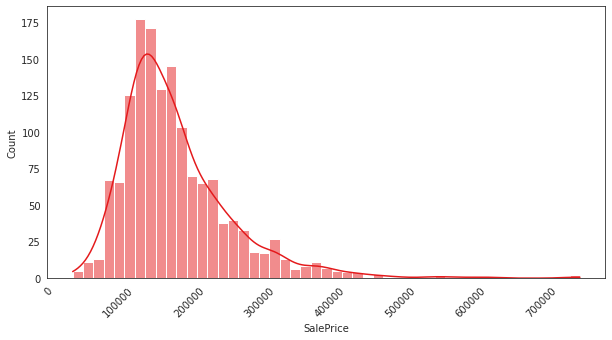

In [14]:
plt.figure(figsize = (10, 5))
sns.histplot(data=train_df, x='SalePrice', kde=True)
plt.xticks(rotation=45)

In [15]:
print('SalePrice Skewness: {}'.format(train_df['SalePrice'].skew()))
print('SalePrice Kurtosis: {}'.format(train_df['SalePrice'].kurt()))

SalePrice Skewness: 1.8828757597682129
SalePrice Kurtosis: 6.536281860064529


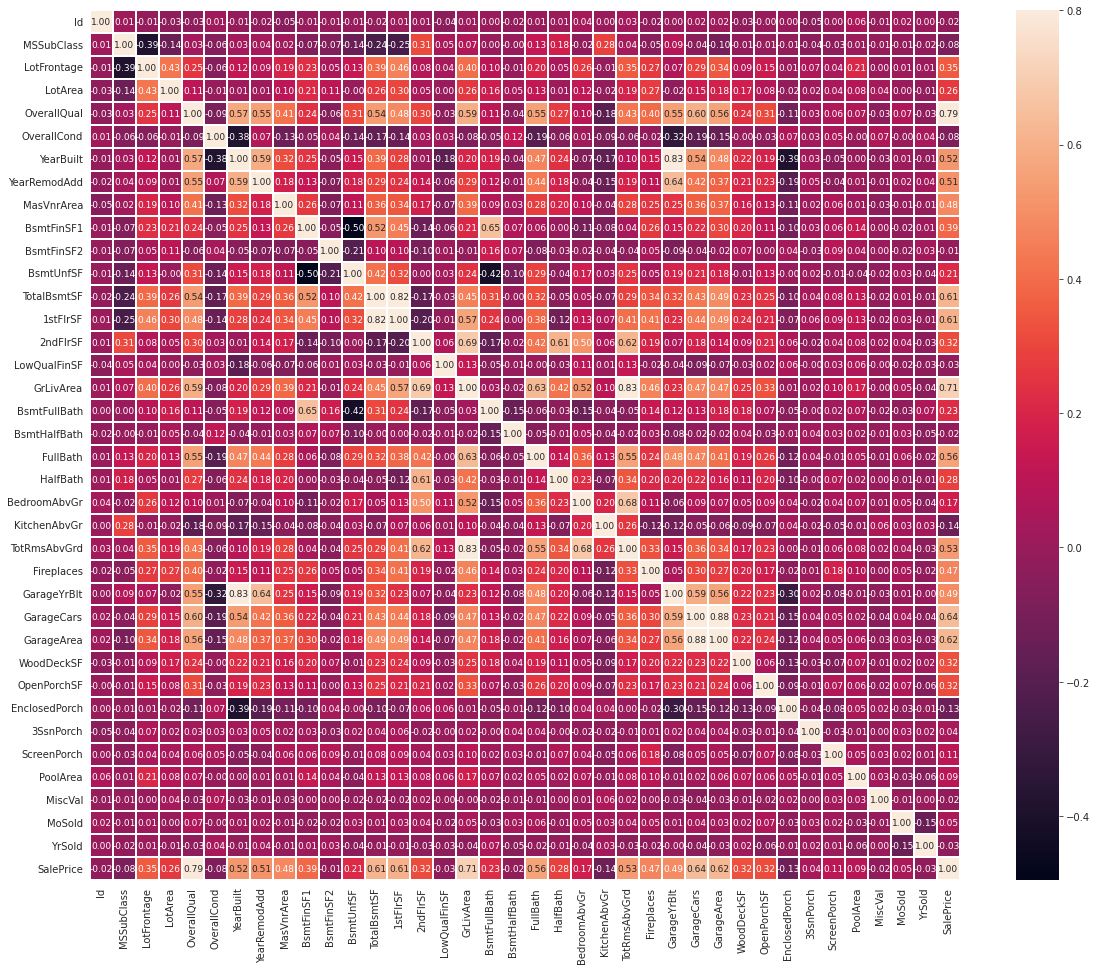

In [16]:
corrmat = train_df.corr()

plt.figure(figsize=(20, 16))
sns.heatmap(corrmat, square=True, linewidths=0.1, linecolor='white', vmax=0.8, annot=True, annot_kws={'size':9}, fmt='.2f');

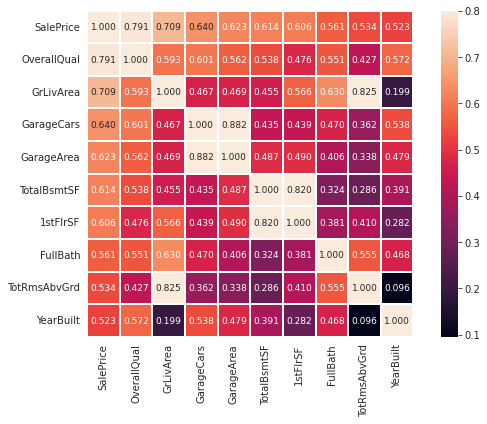

In [17]:
cols = corrmat.nlargest(10, 'SalePrice')['SalePrice'].index

plt.figure(figsize=(10, 6))
sns.heatmap(train_df[cols].corr(), square=True, linewidths=0.1, linecolor='white', vmax=0.8, annot=True, annot_kws={'size':9}, fmt='.3f');

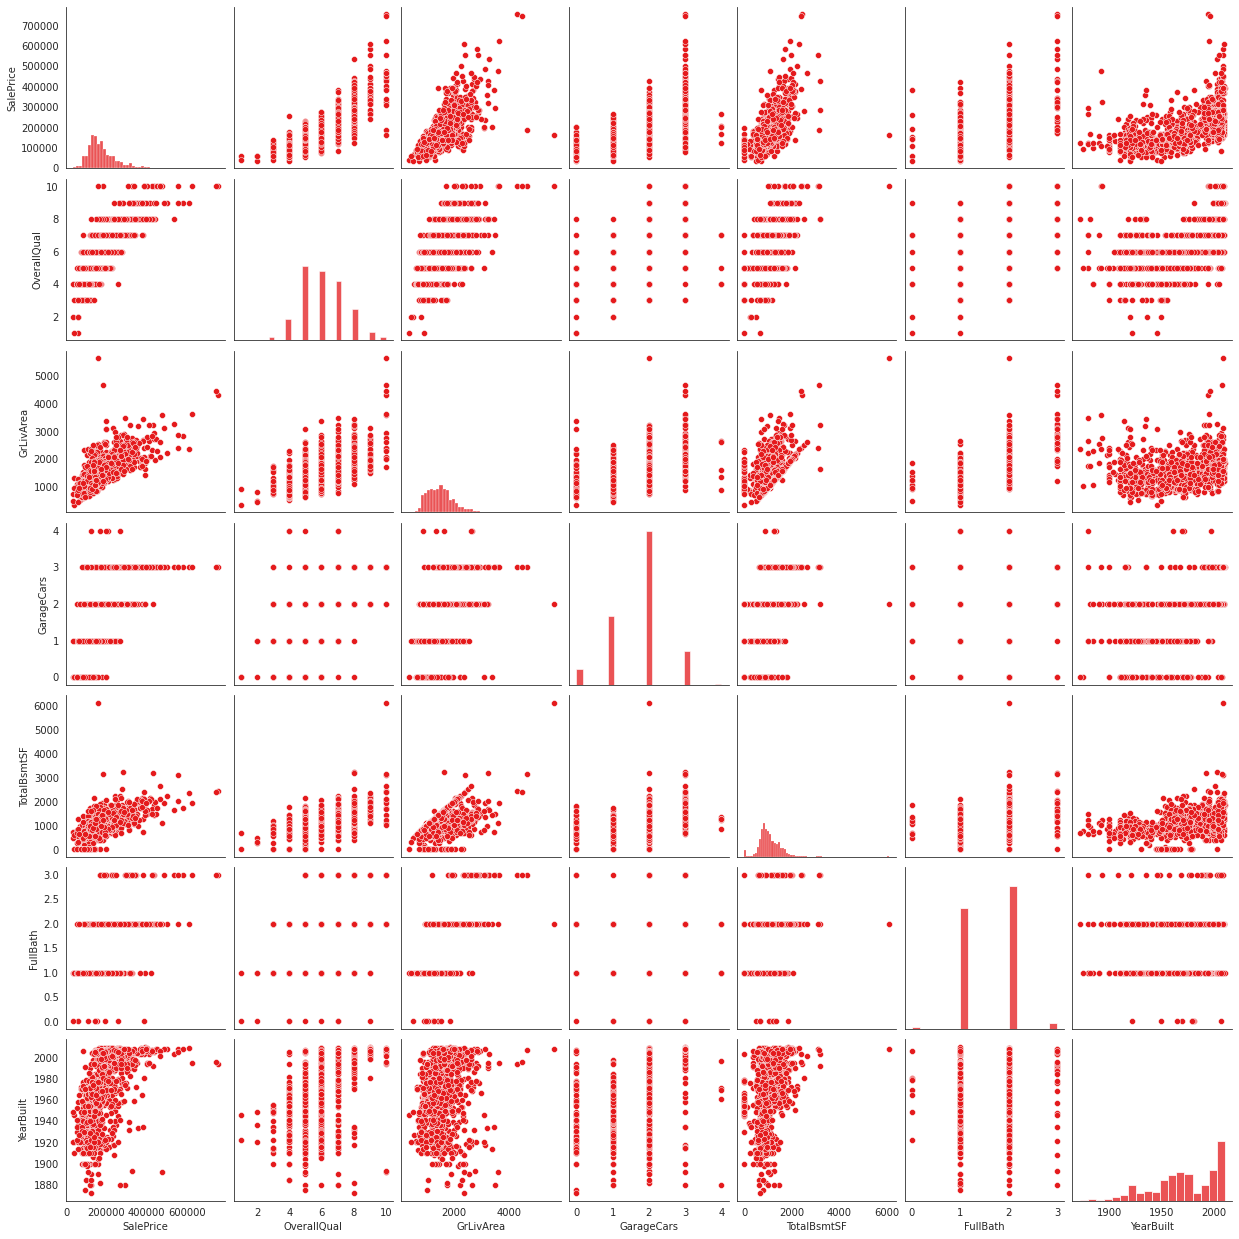

In [18]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train_df[cols]);

In [19]:
def plot_num(data, x, y):
    plt.figure(figsize=(15, 8))
    sns.regplot(data=data, x=x, y=y, marker='*', robust=True)
    plt.xticks(rotation=45)
    plt.show()

def plot_cat(data, x, y):
    plt.figure(figsize=(20, 8))
    sns.boxplot(data=data, x=x, y=y)
    plt.xticks(rotation=90)
    plt.show()

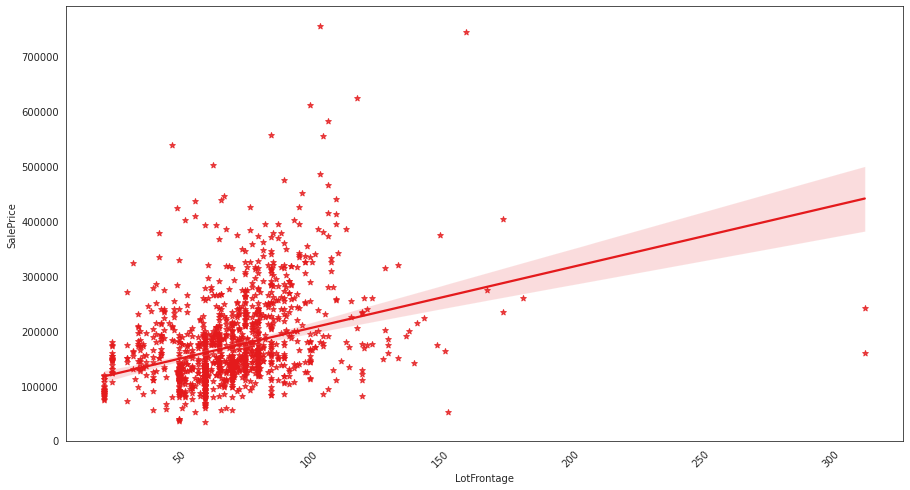

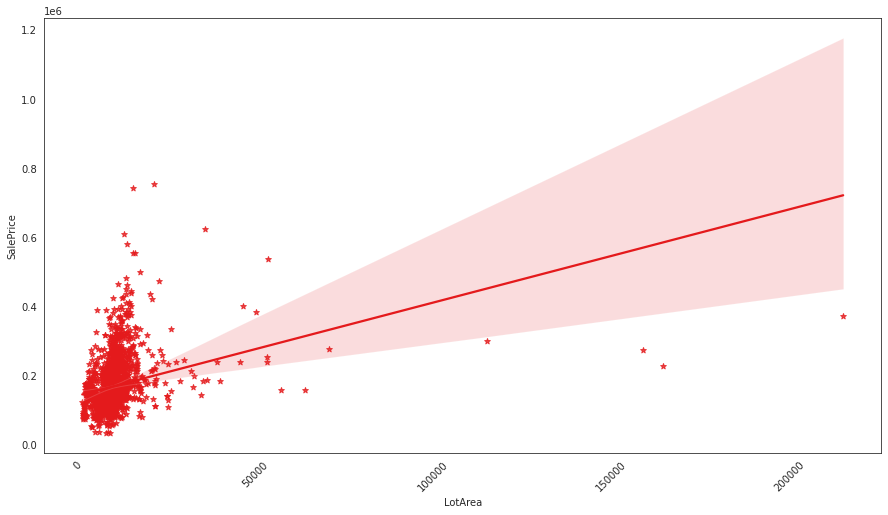

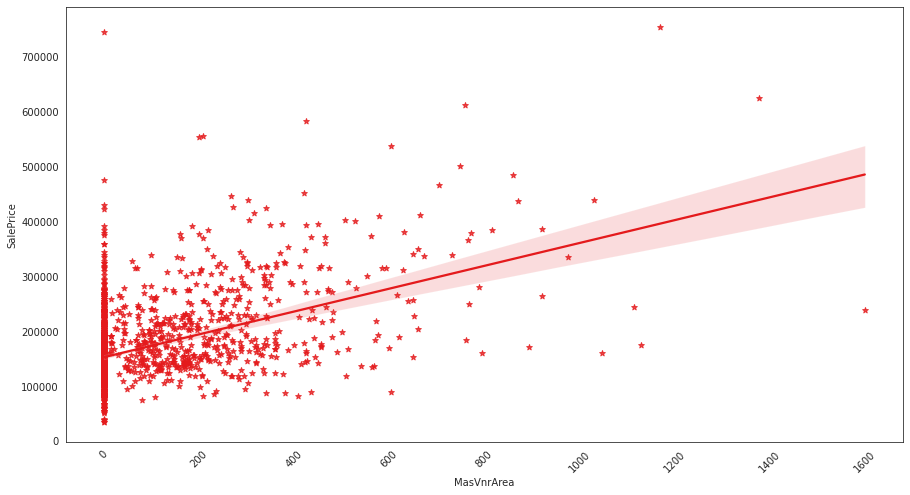

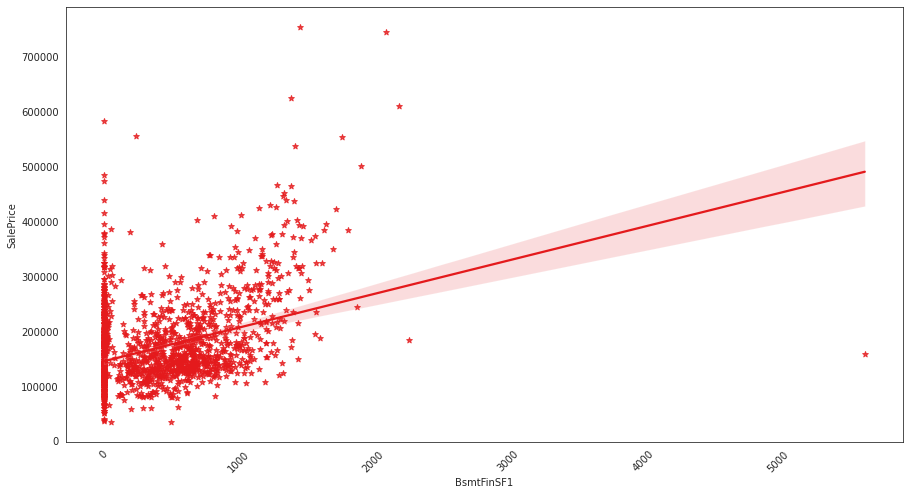

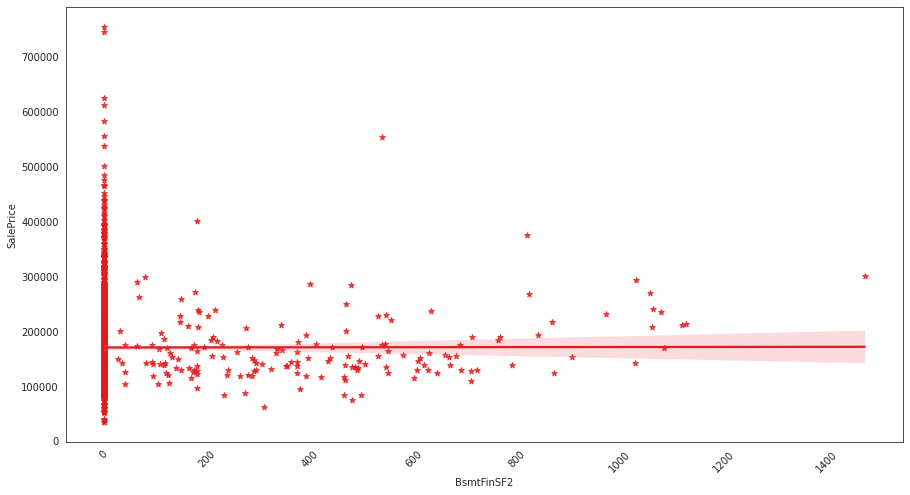

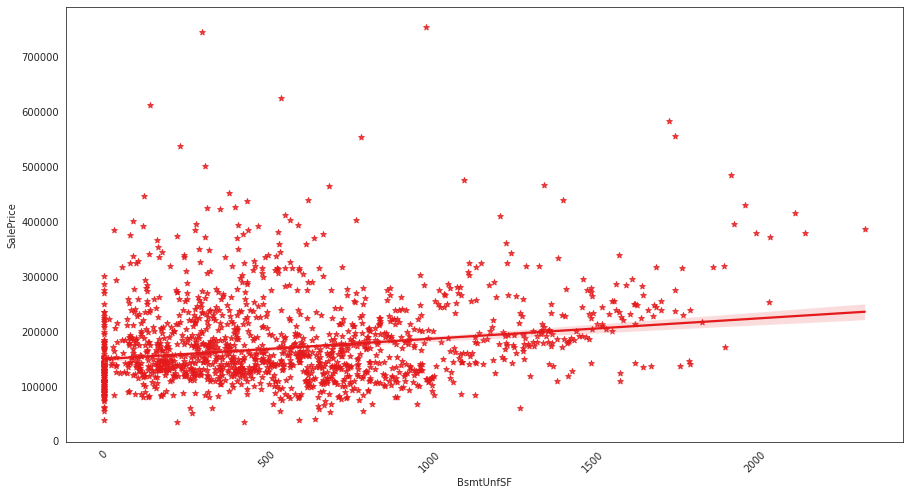

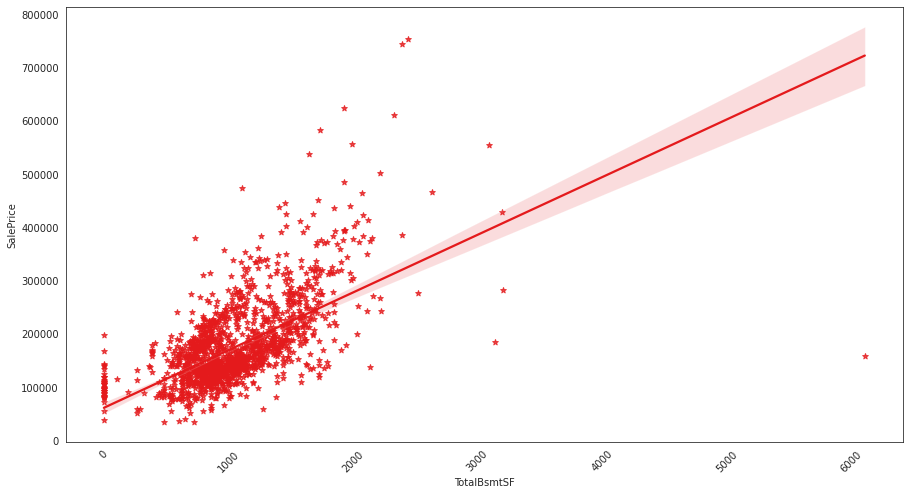

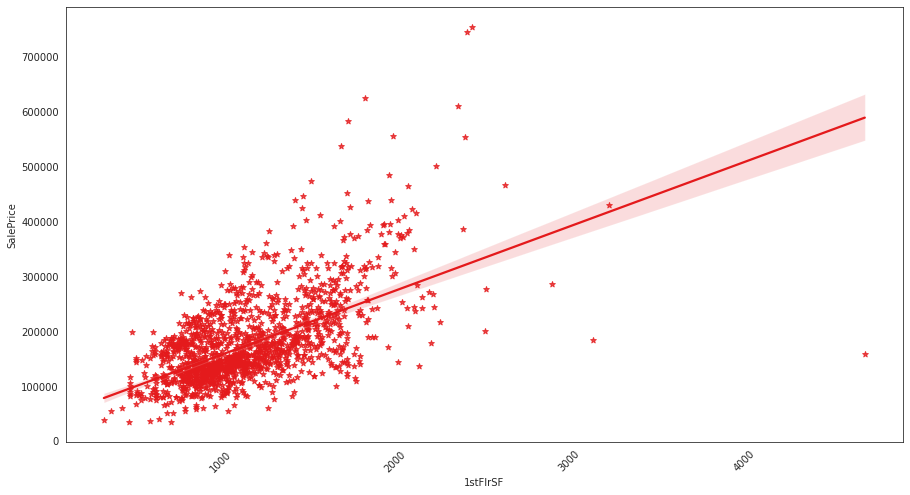

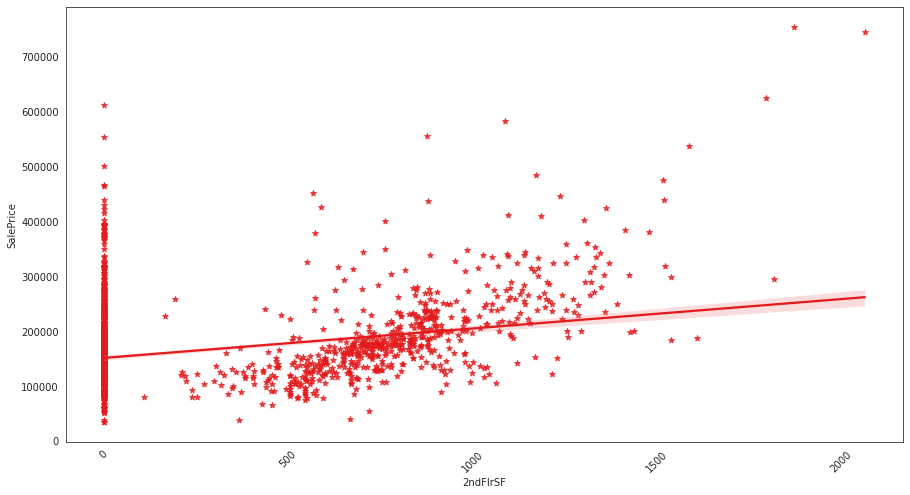

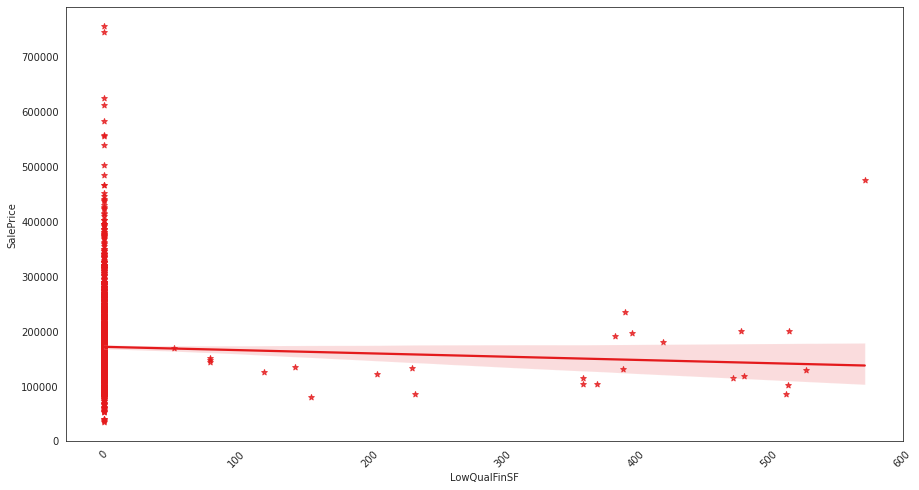

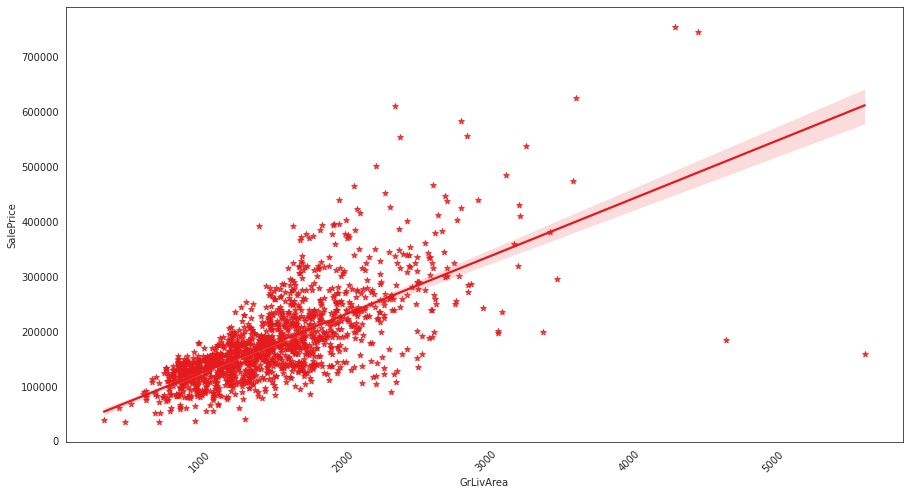

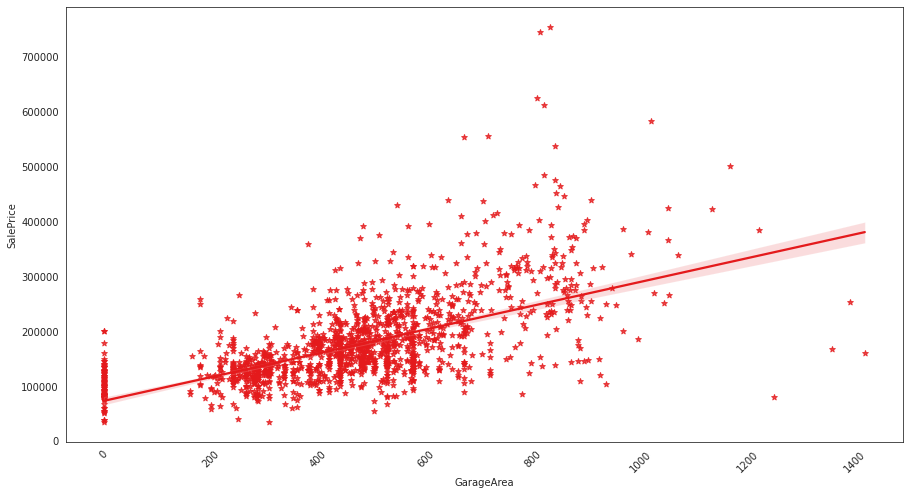

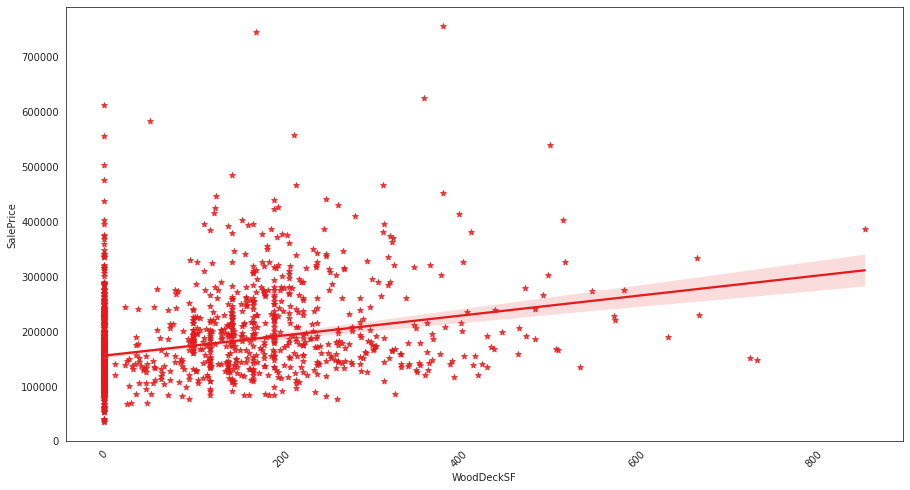

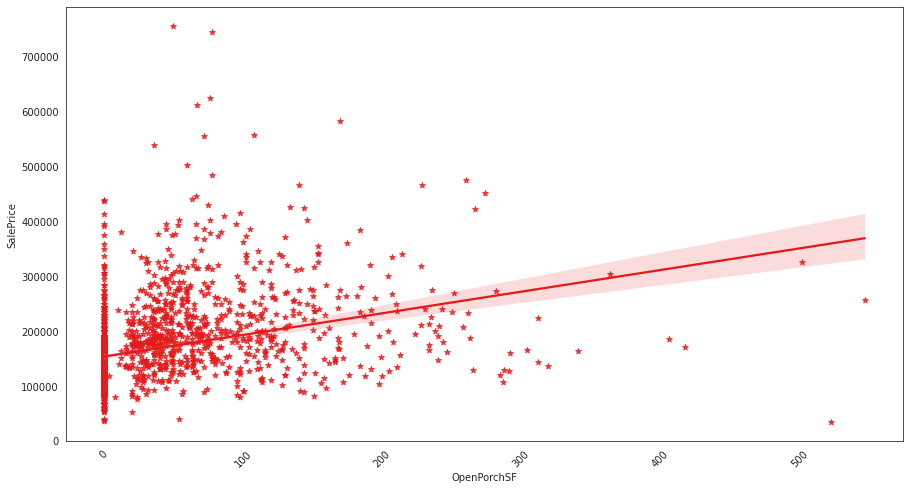

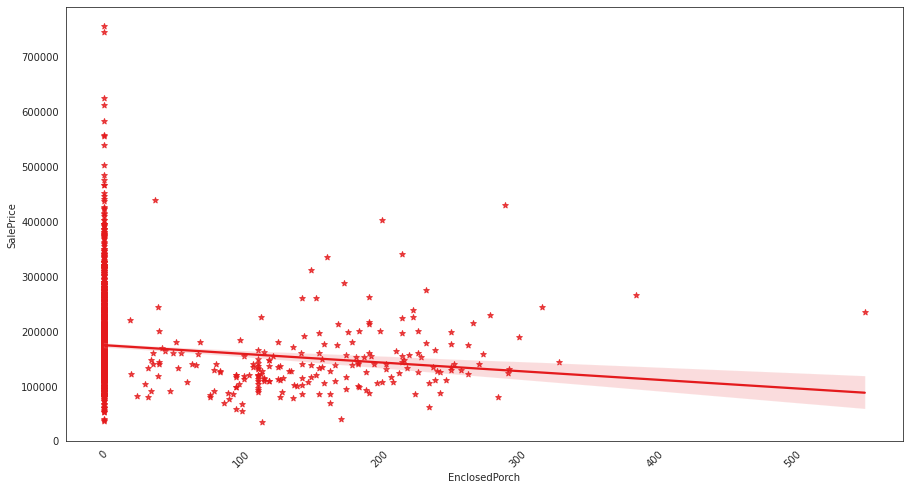

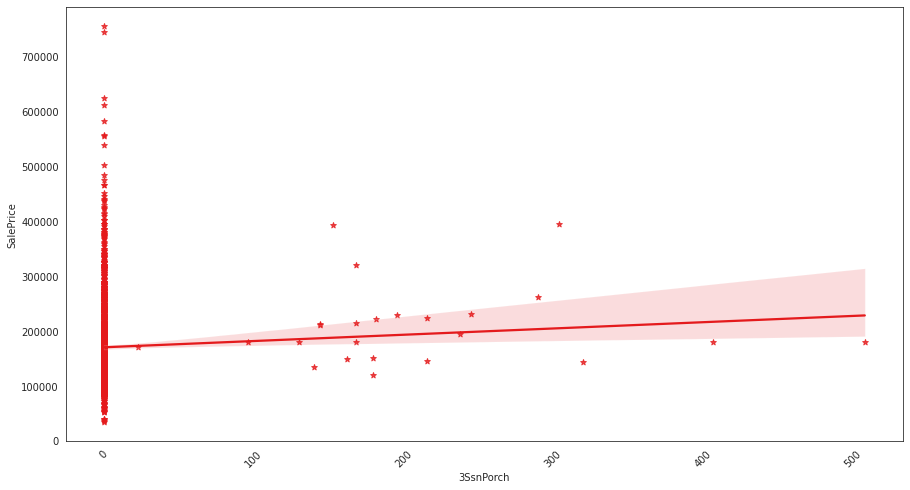

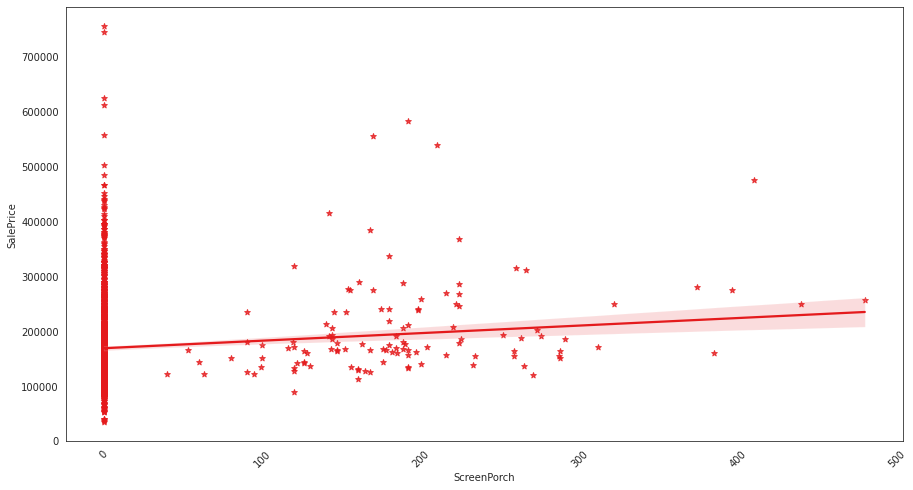

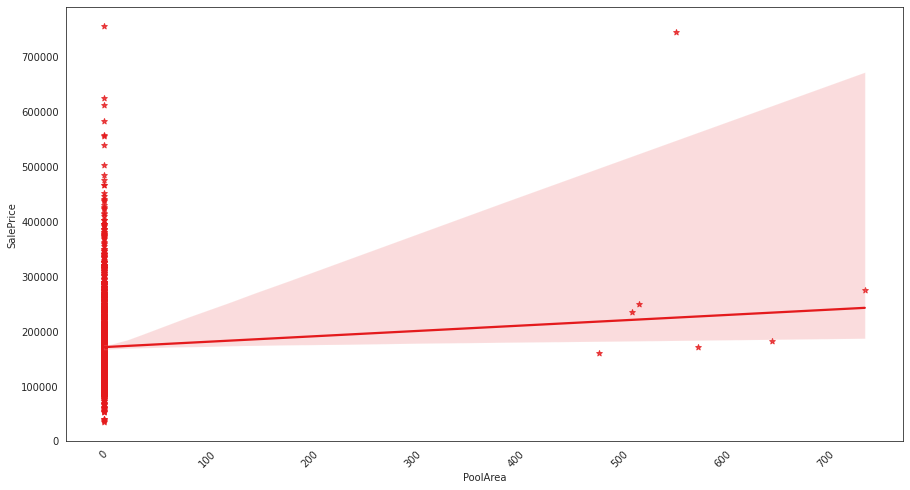

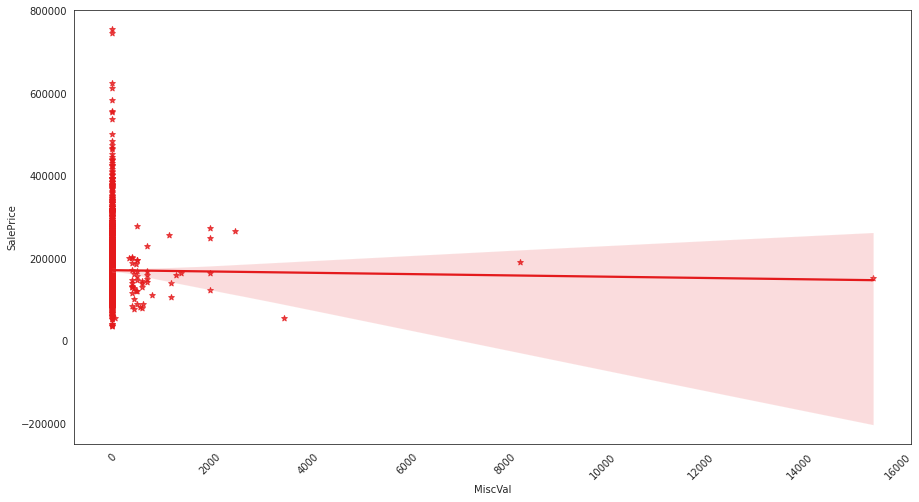

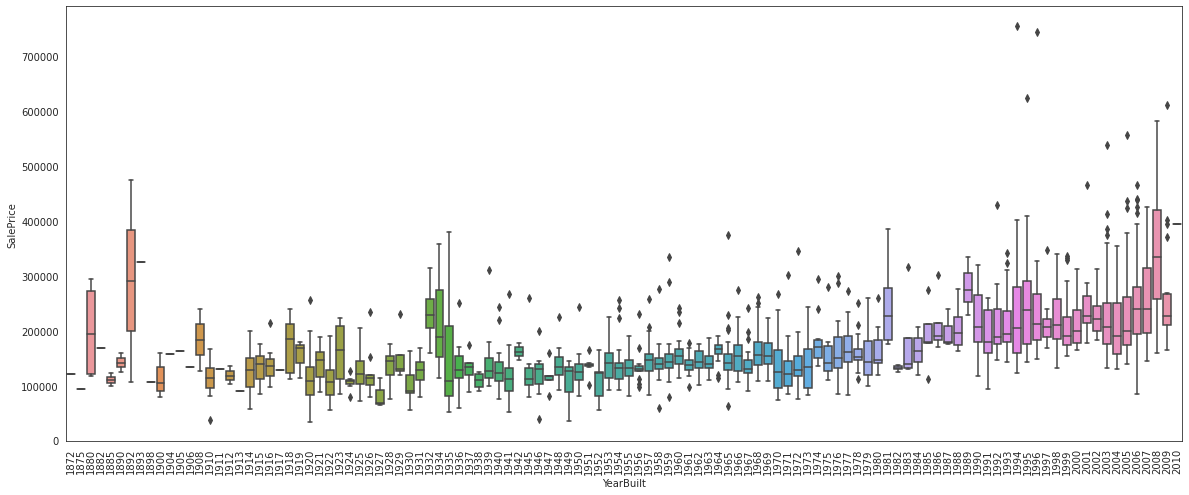

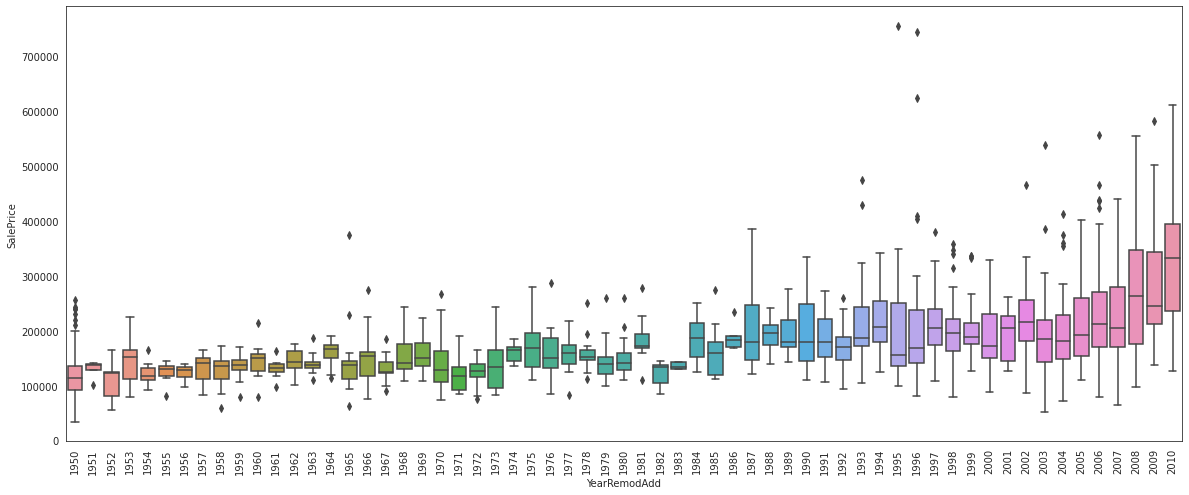

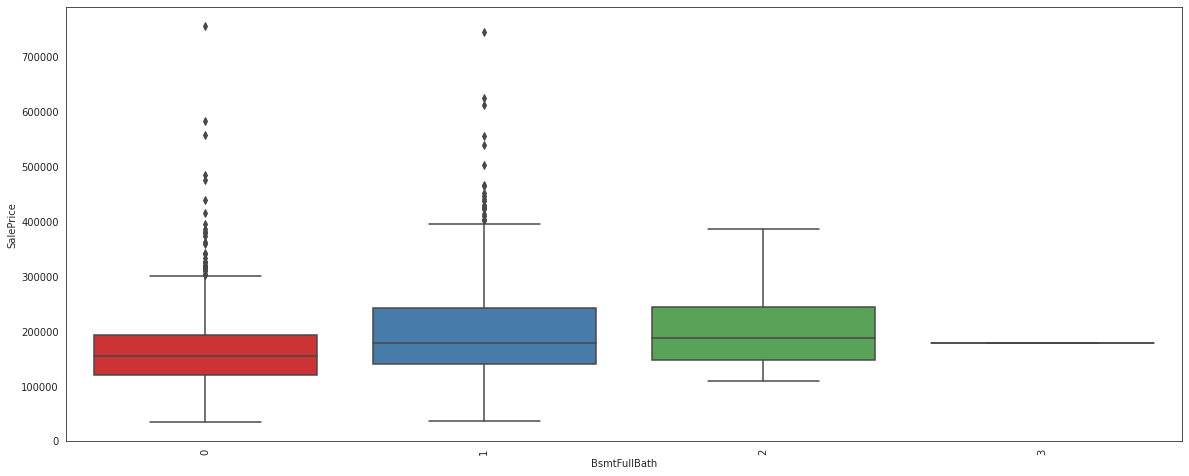

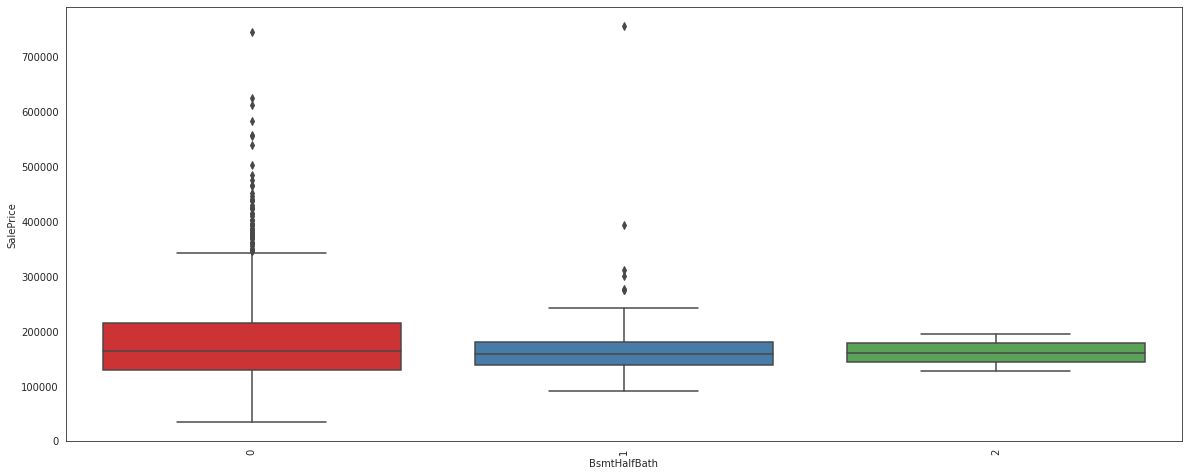

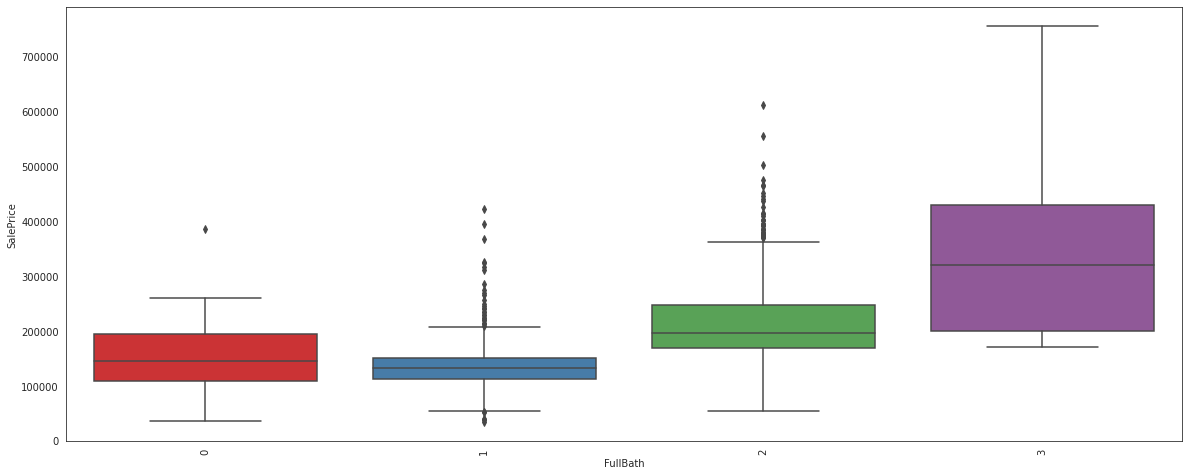

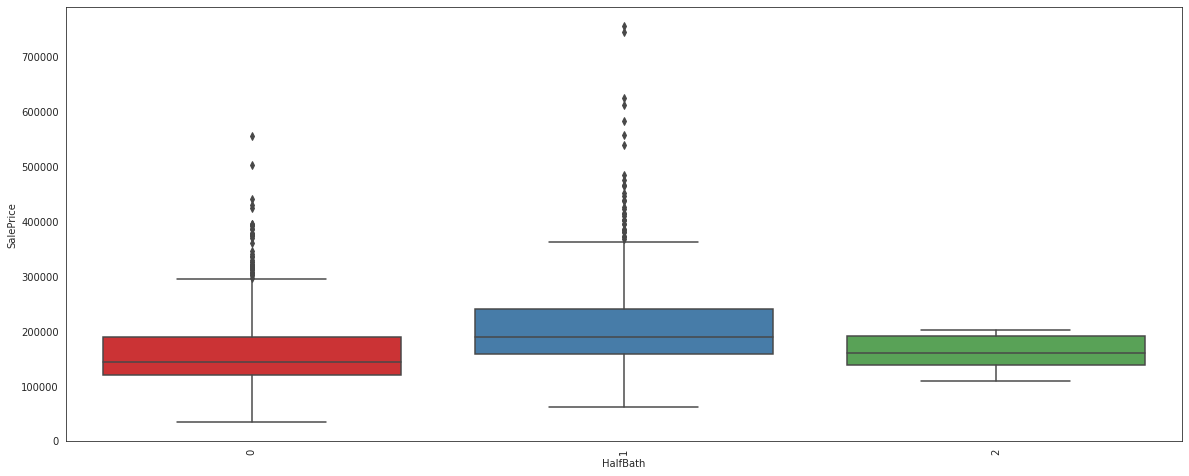

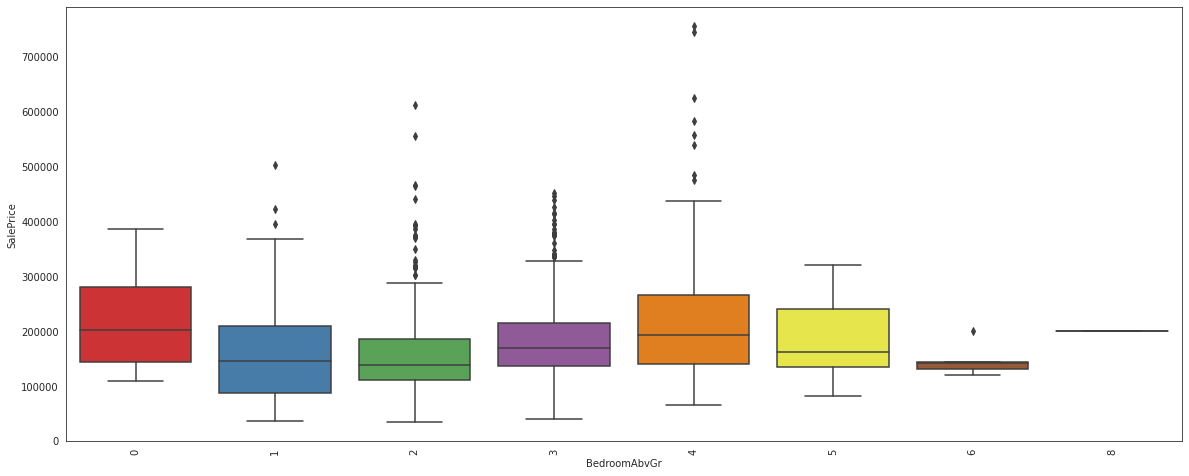

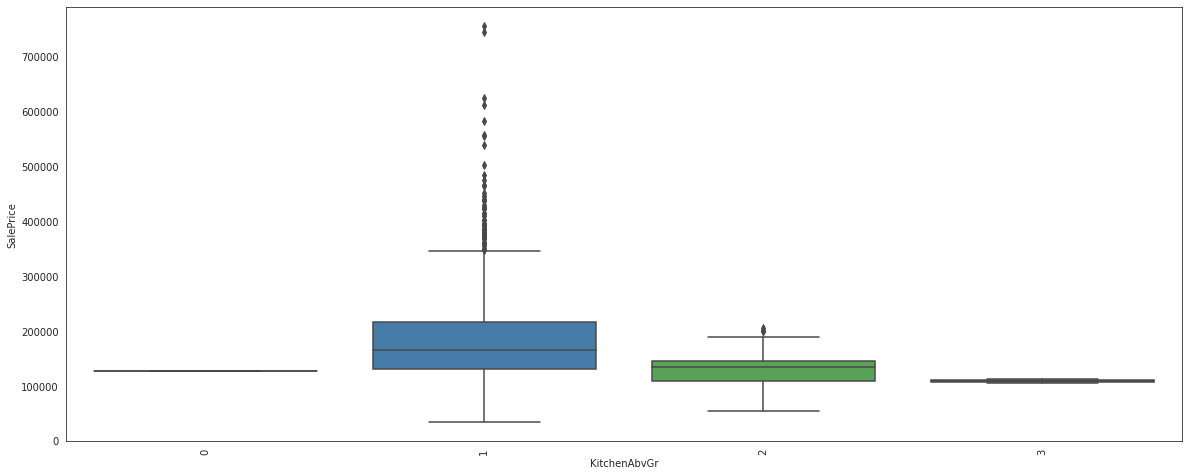

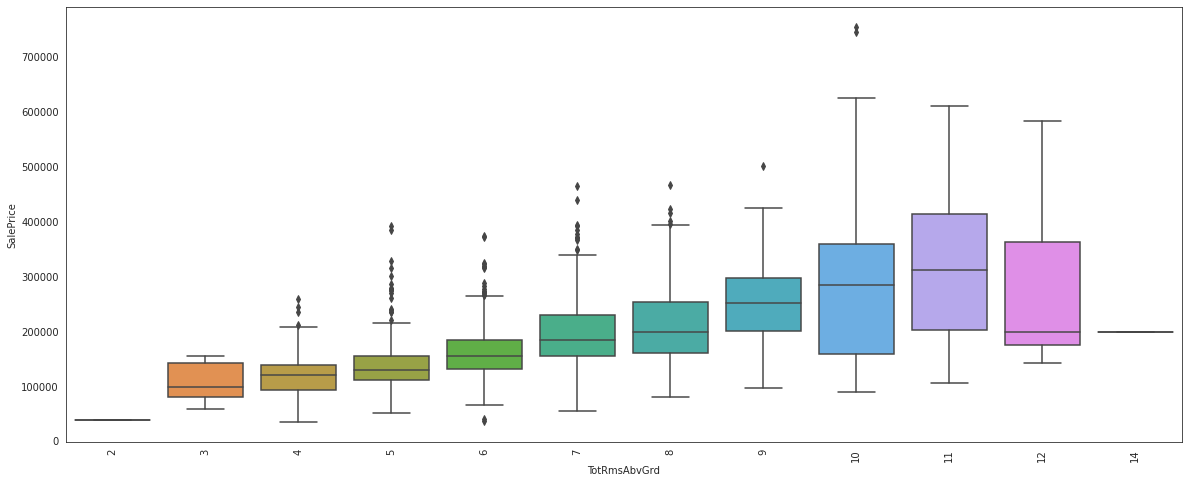

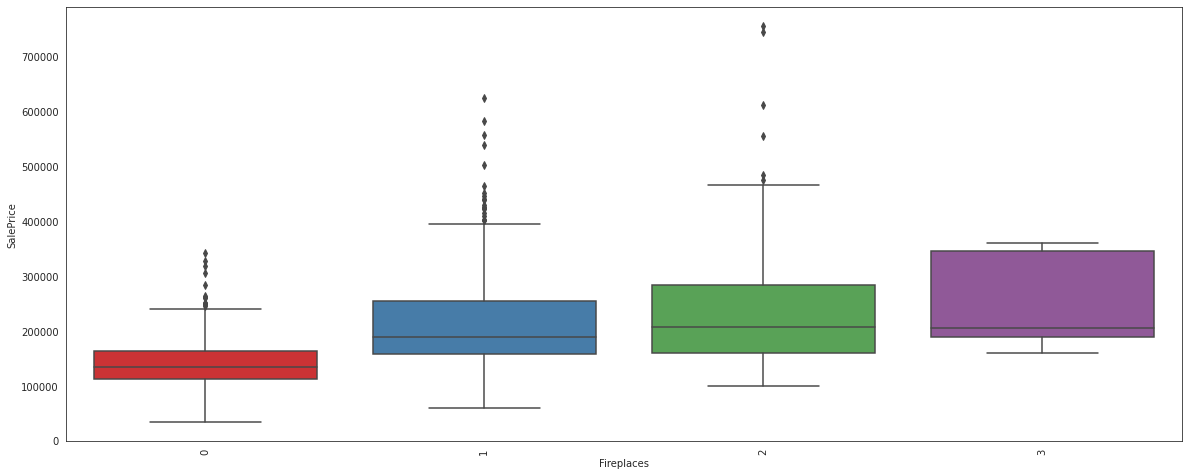

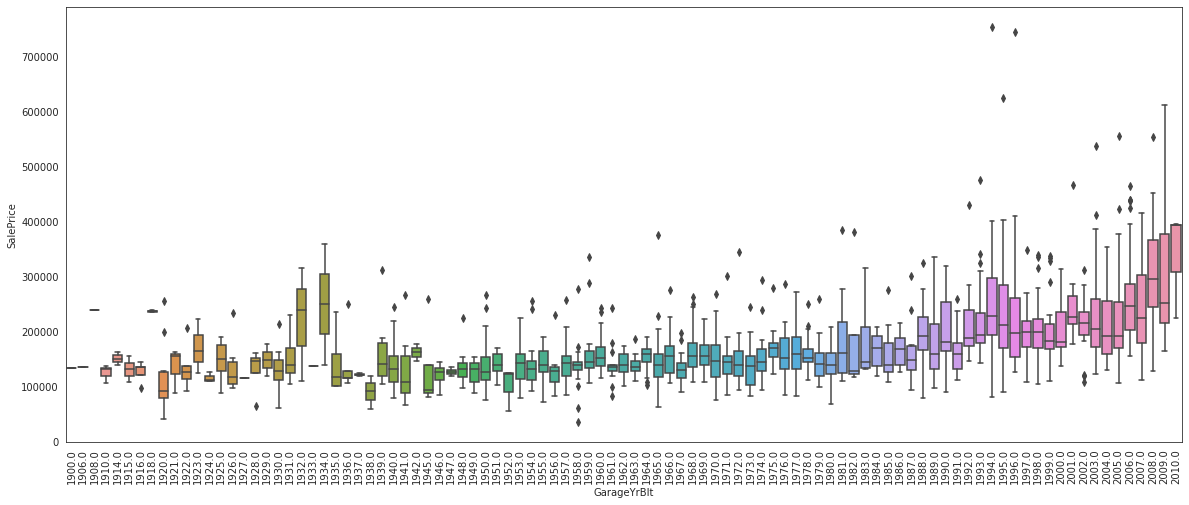

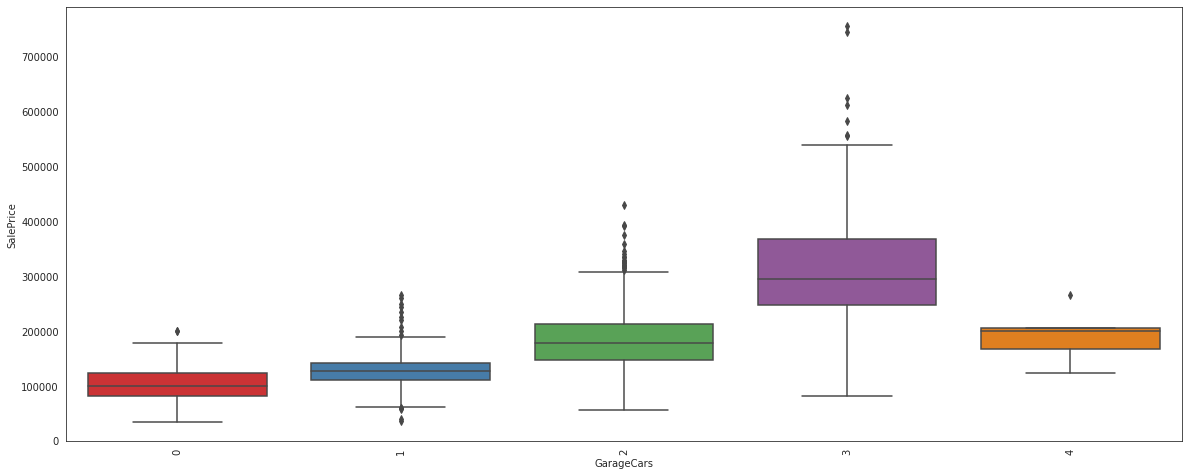

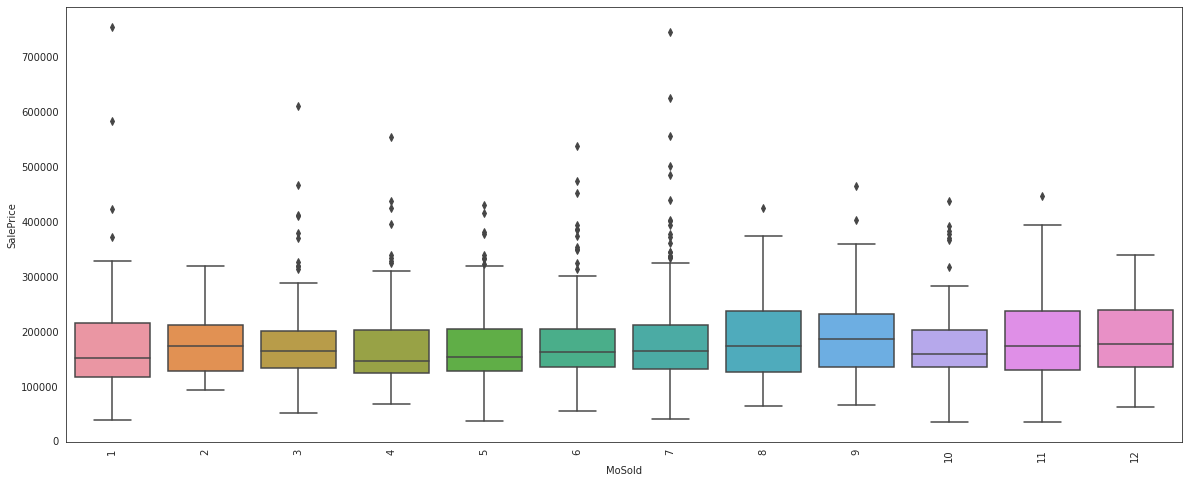

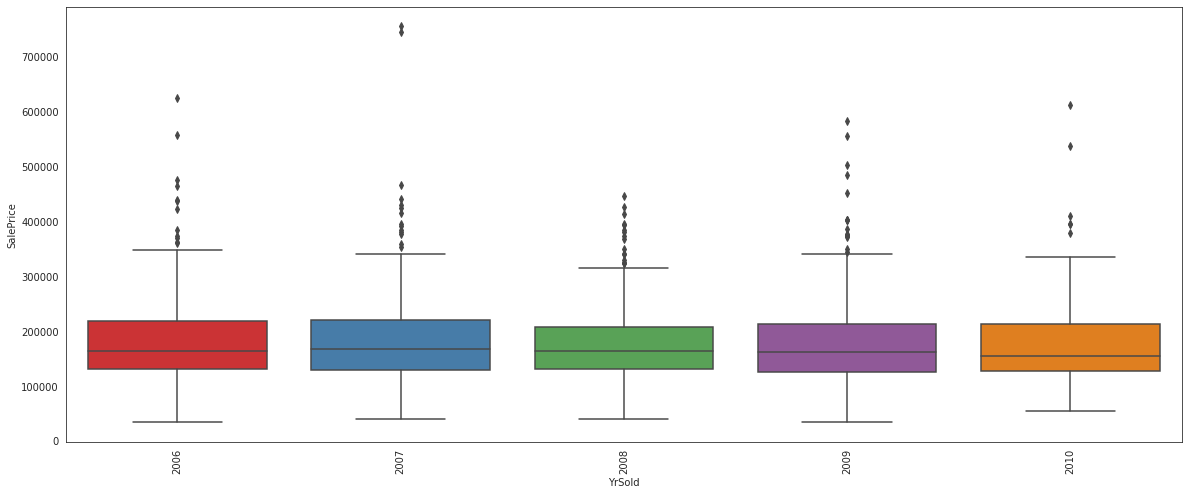

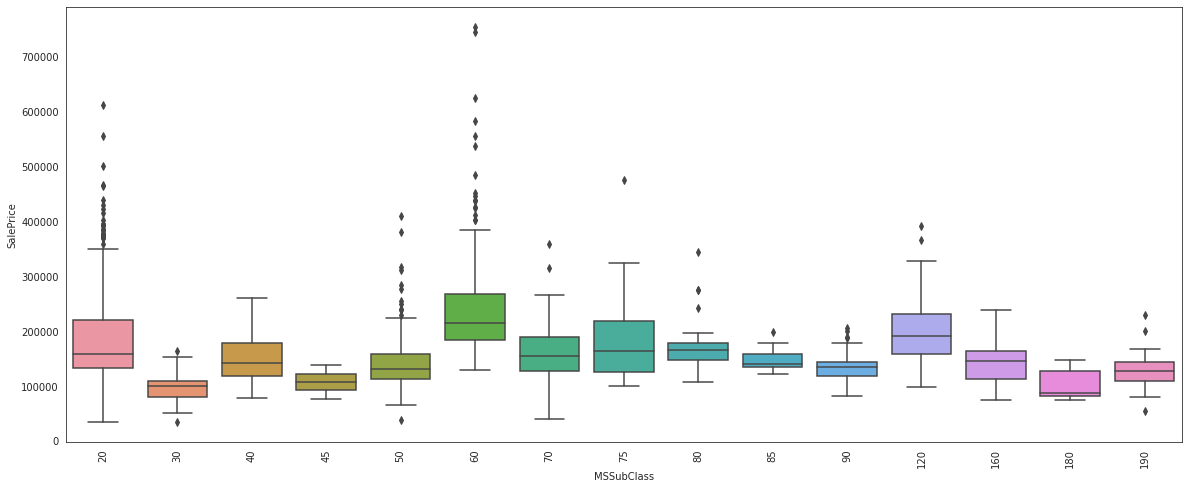

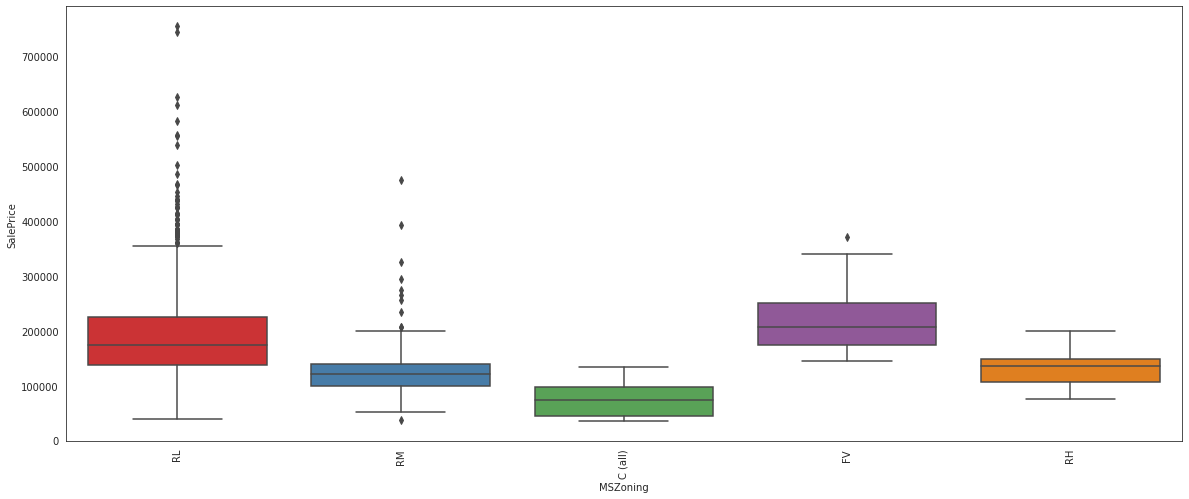

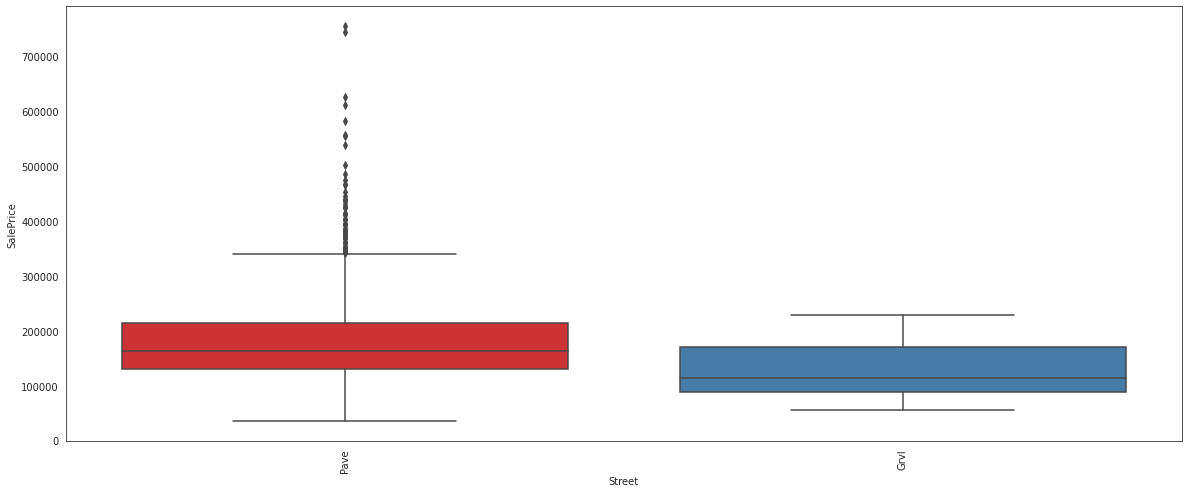

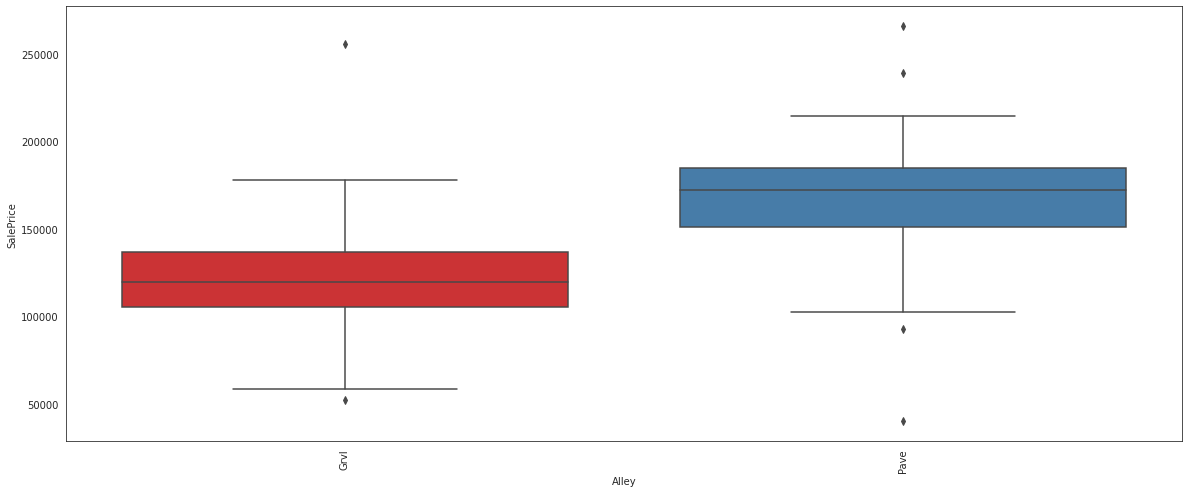

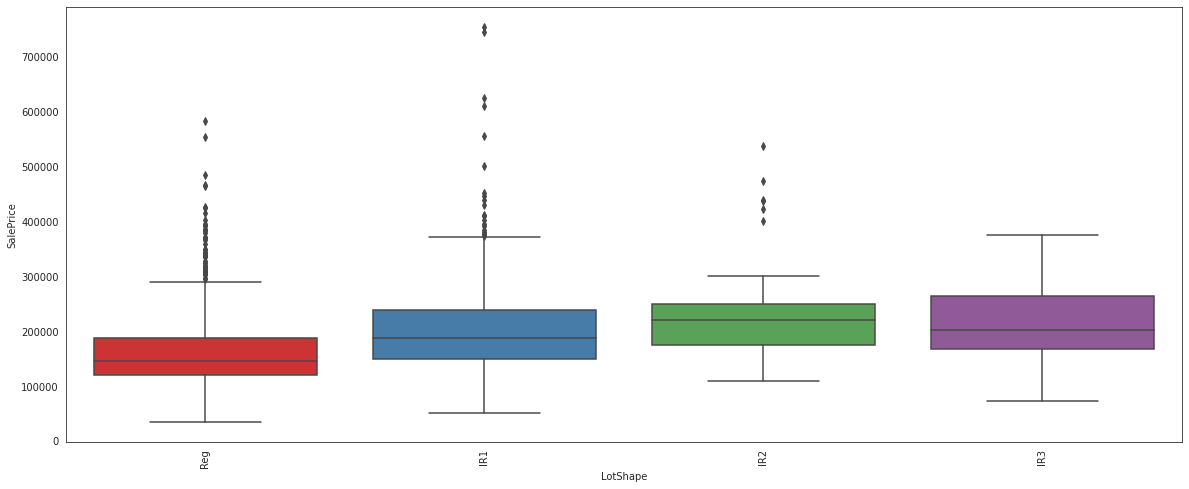

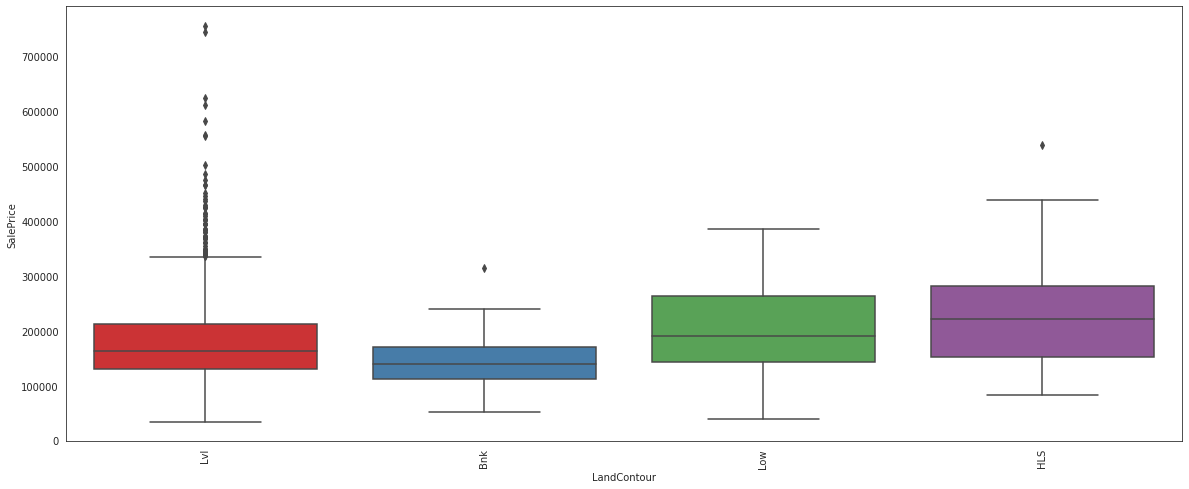

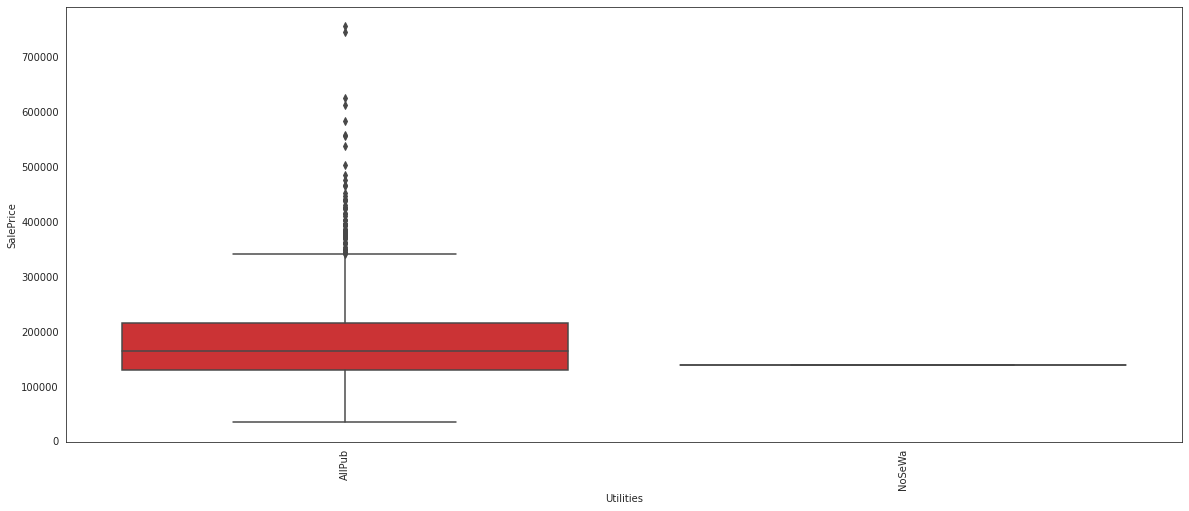

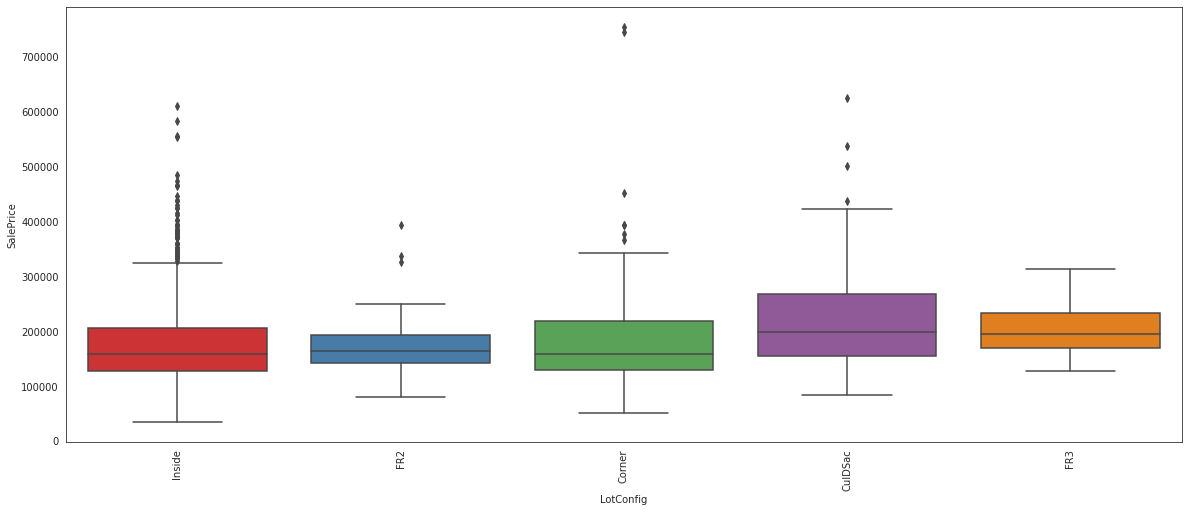

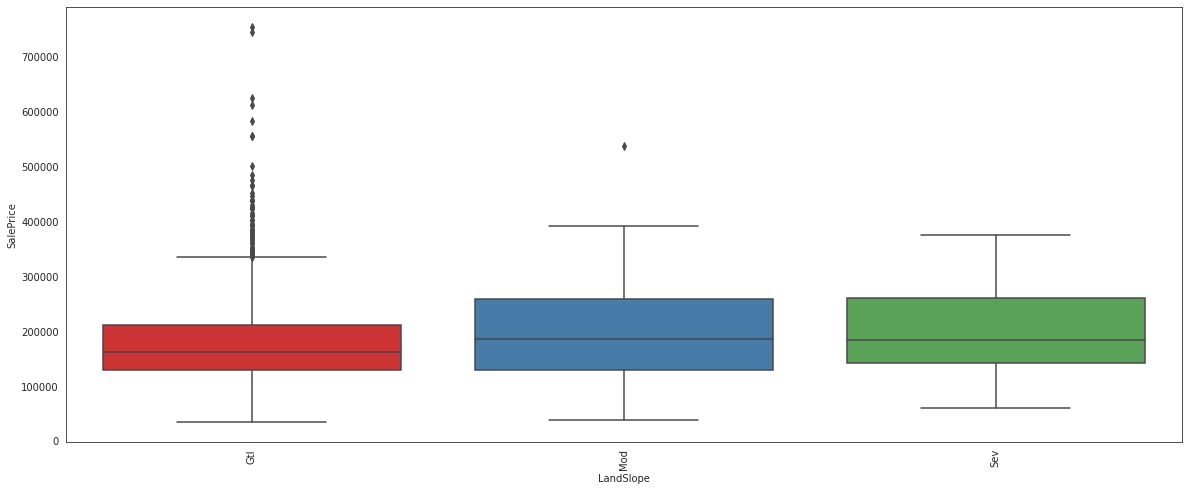

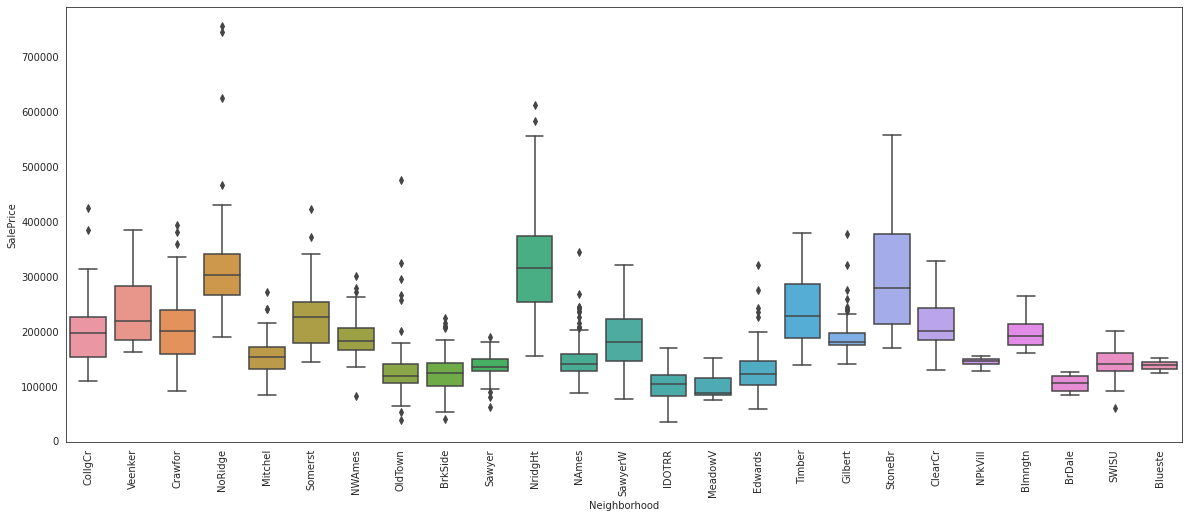

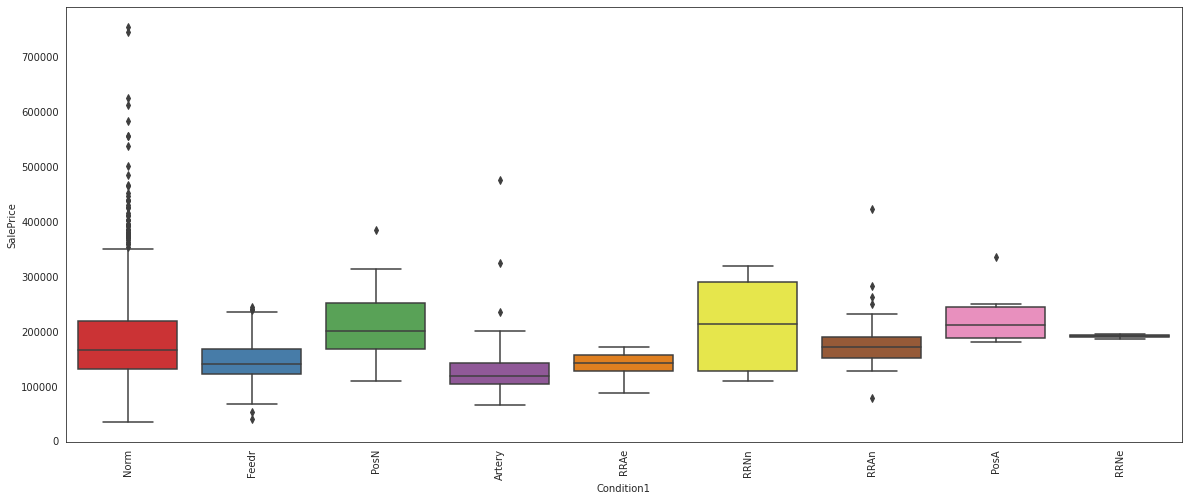

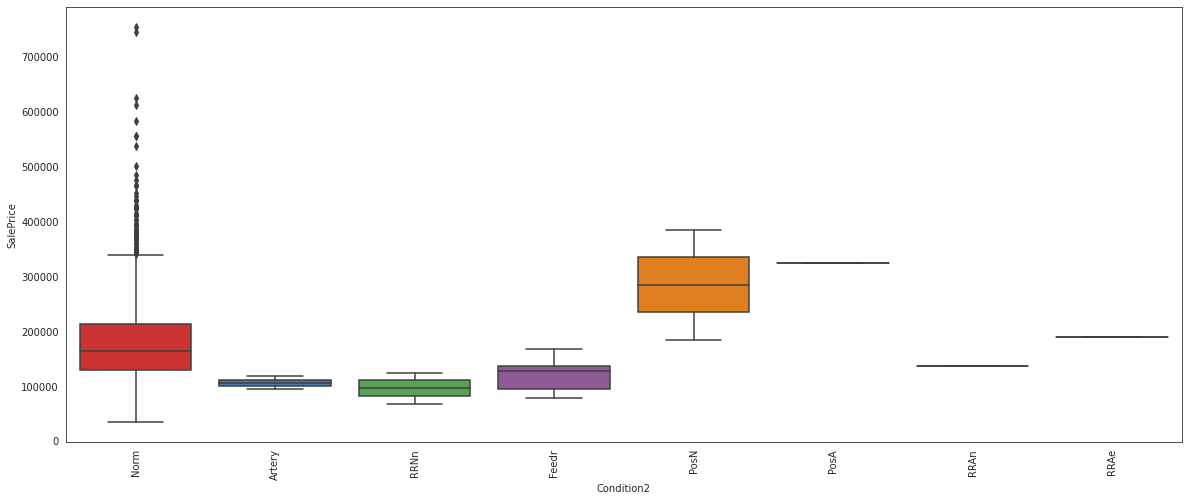

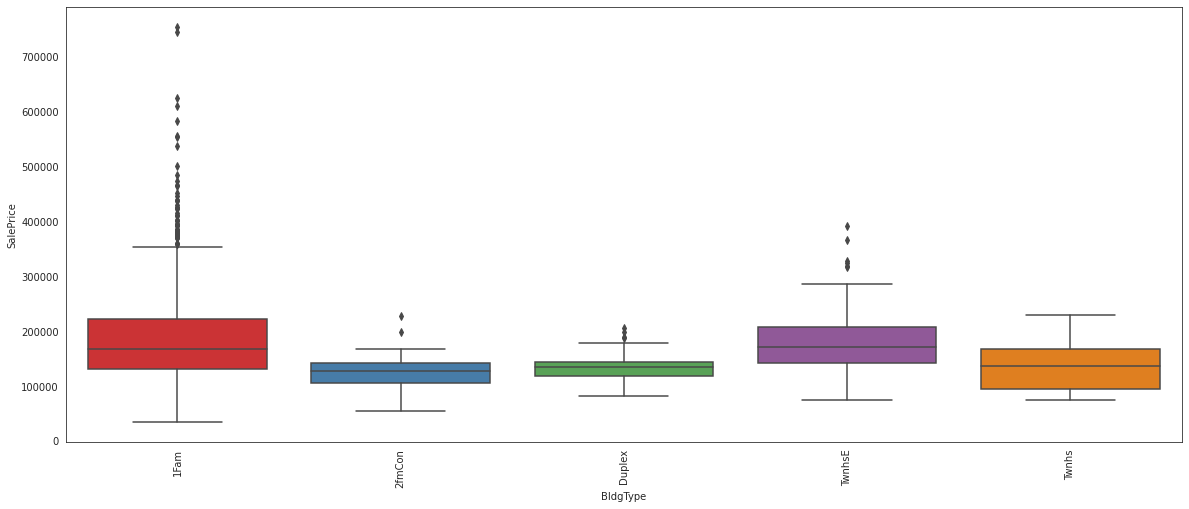

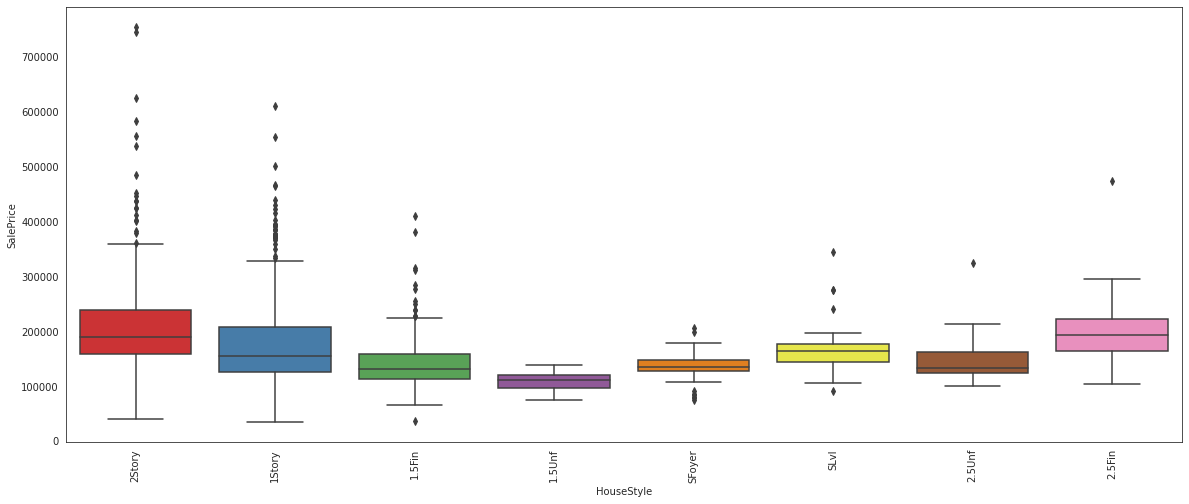

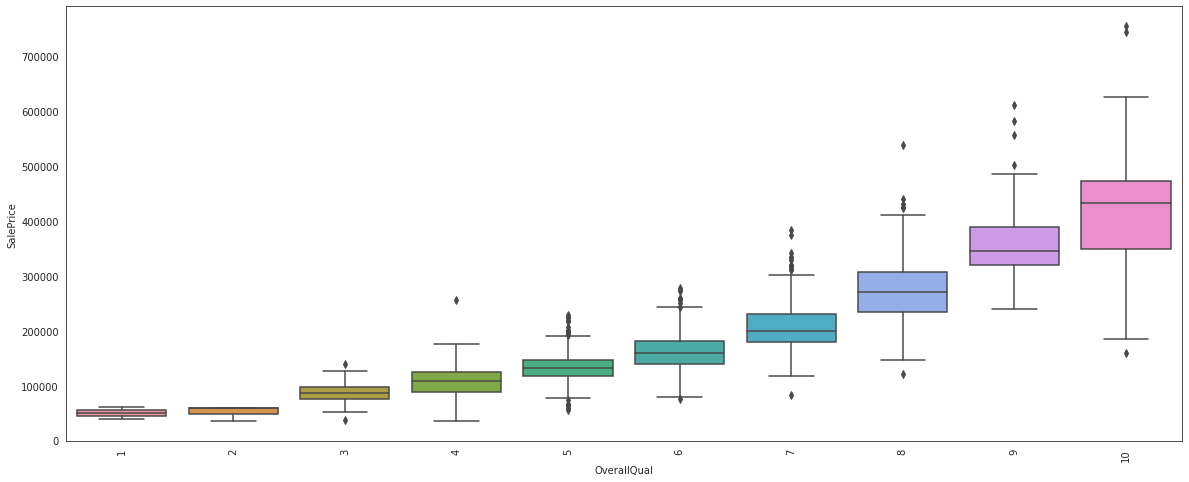

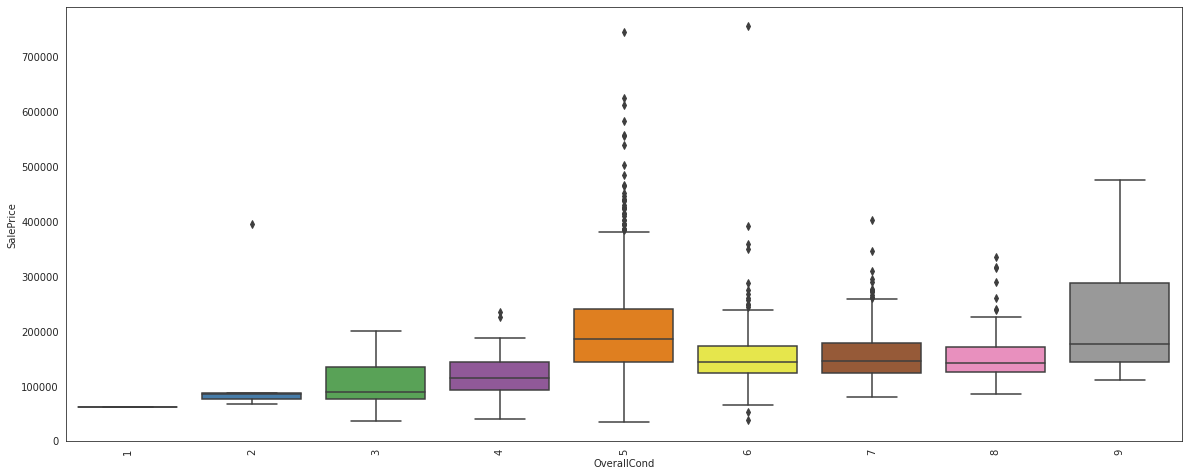

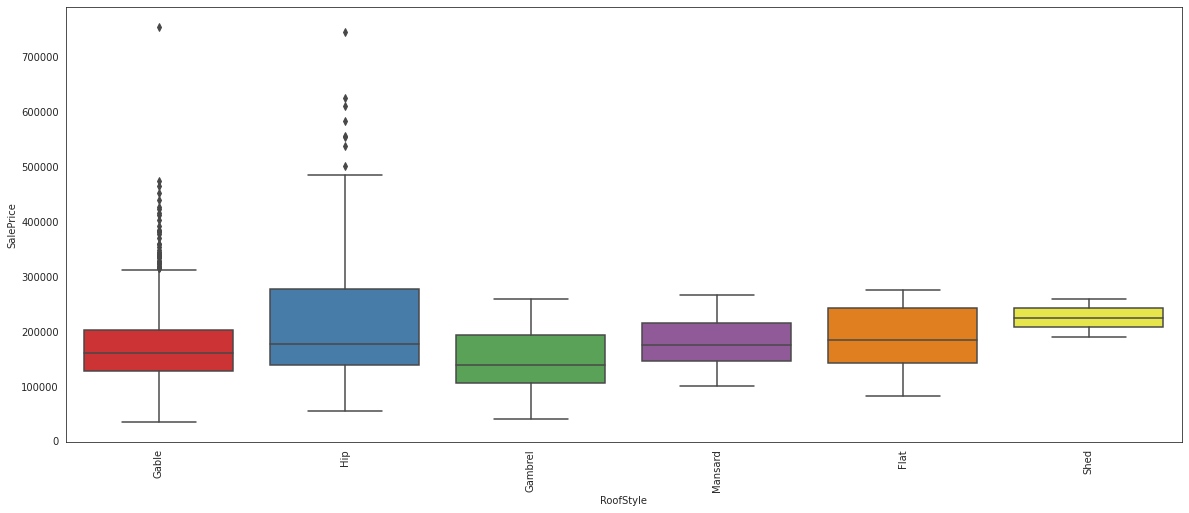

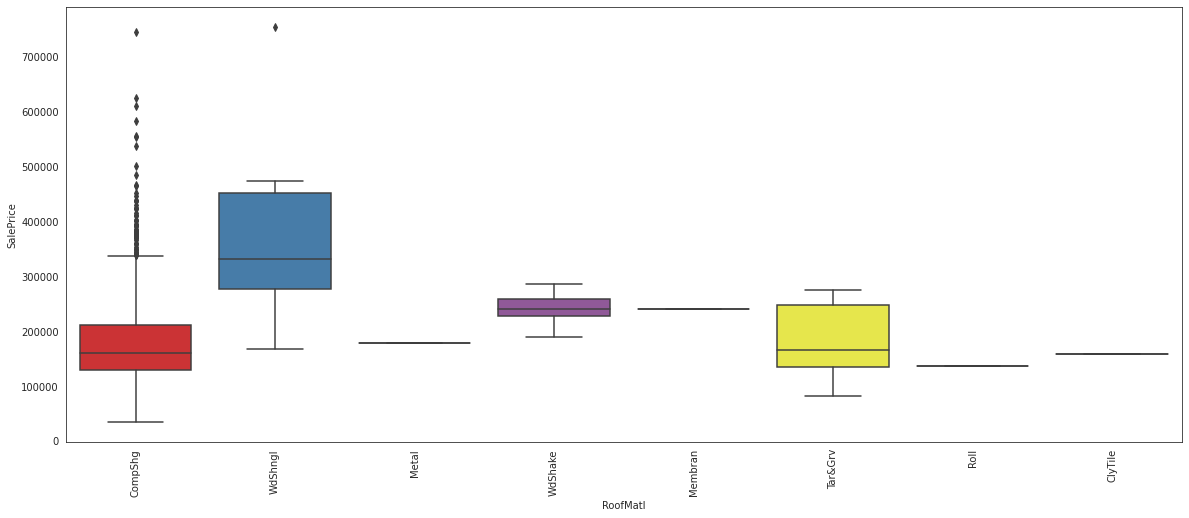

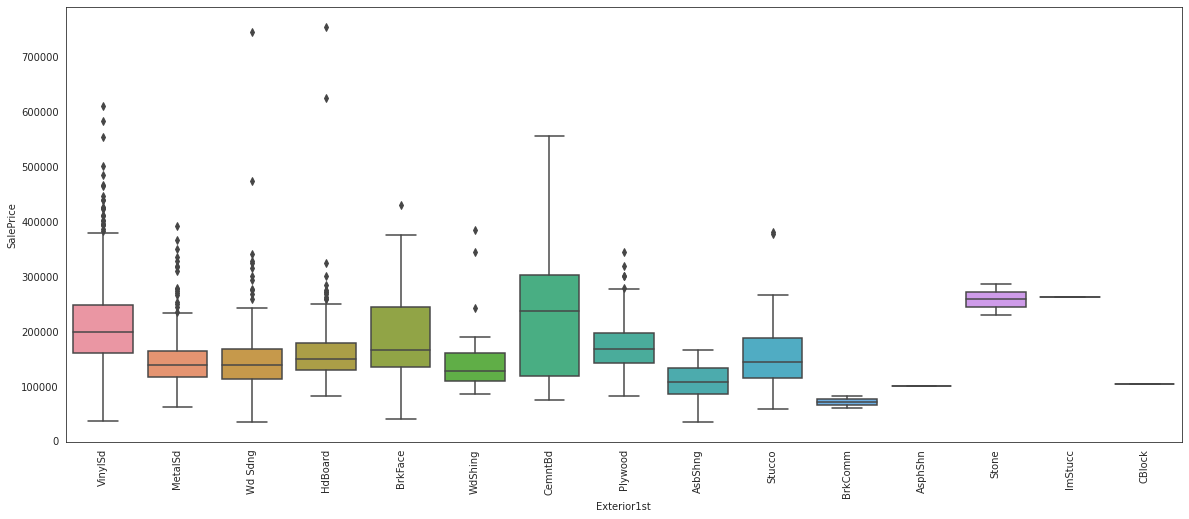

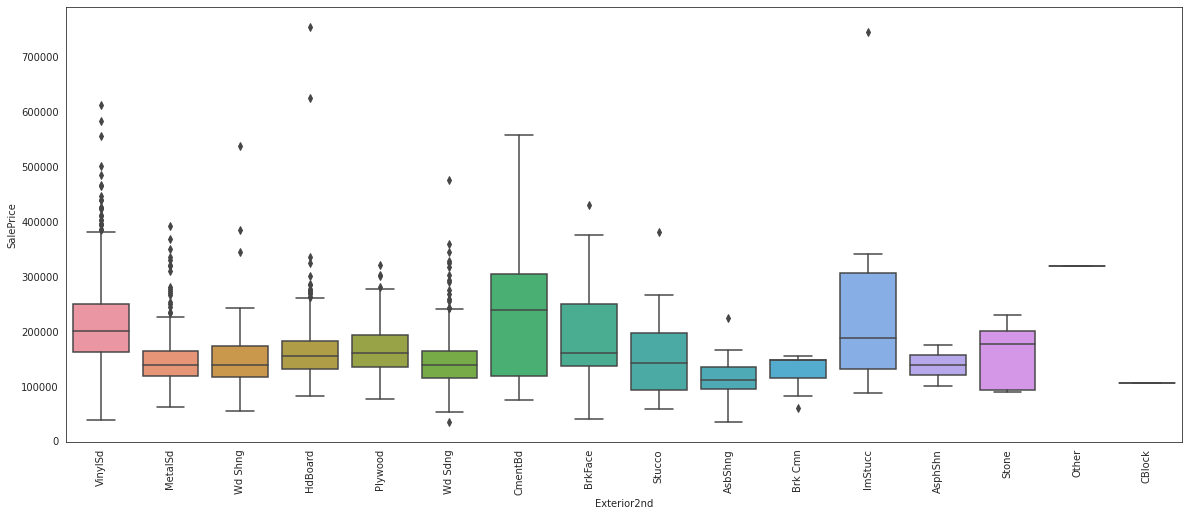

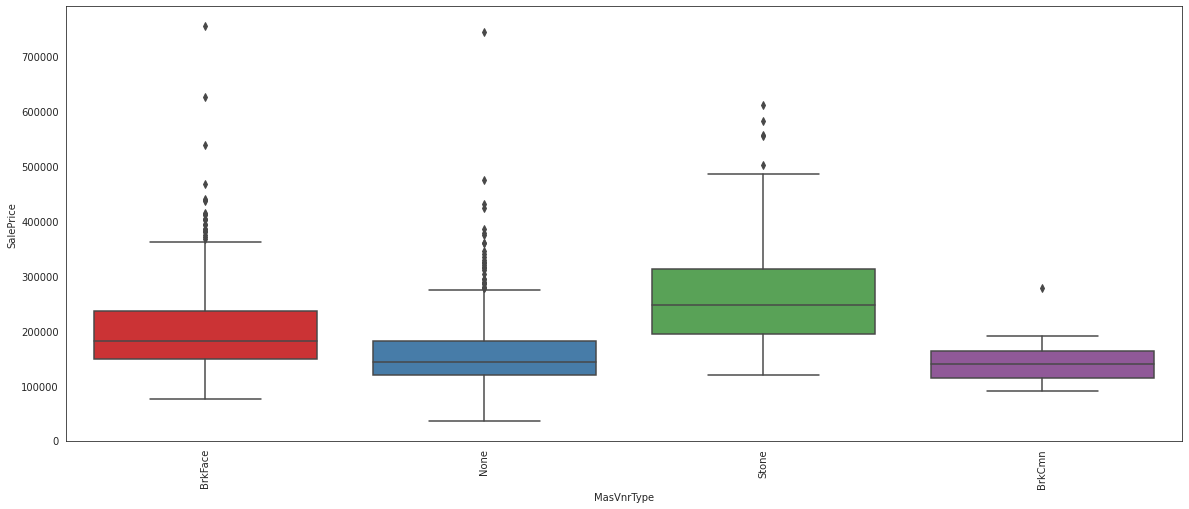

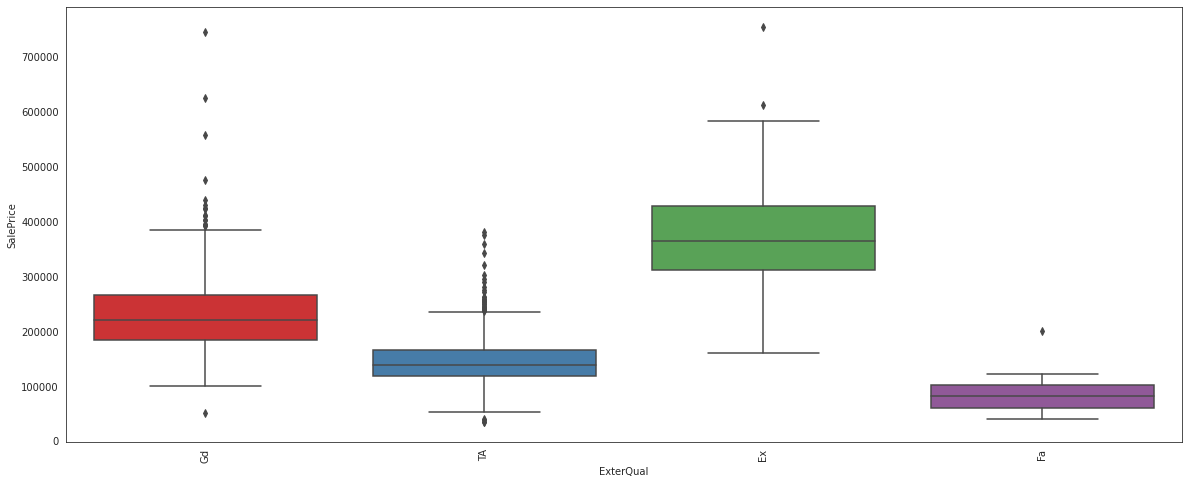

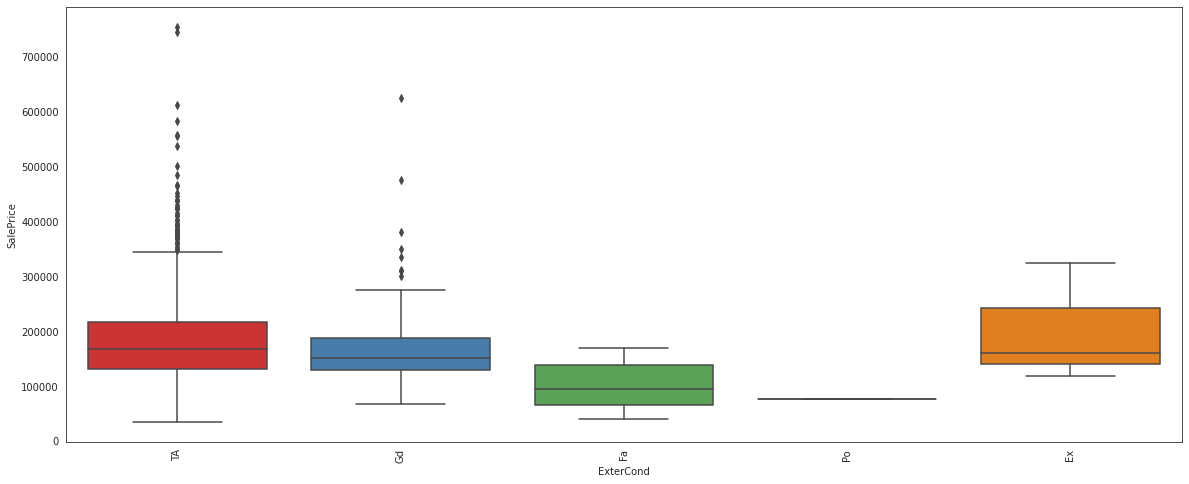

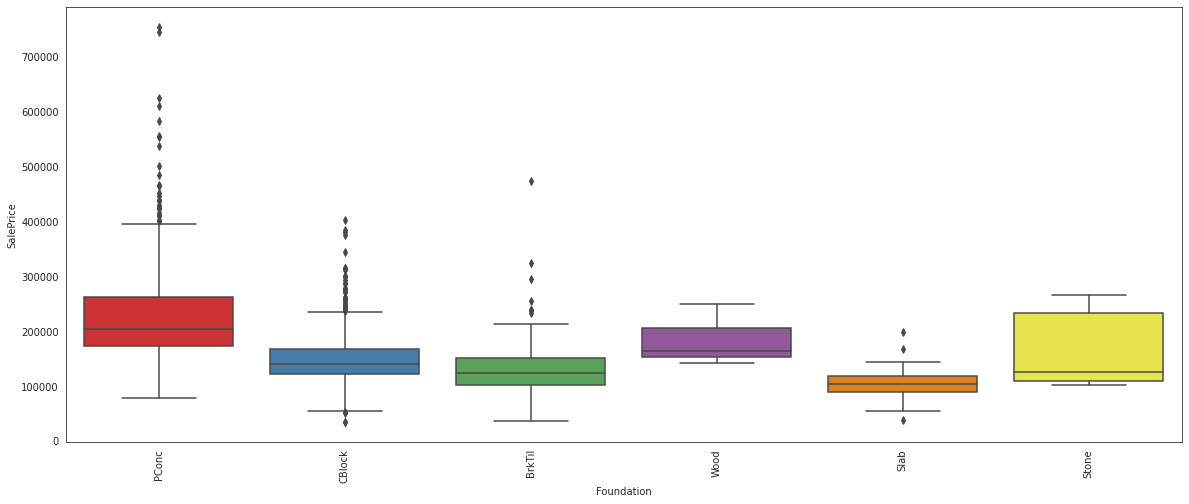

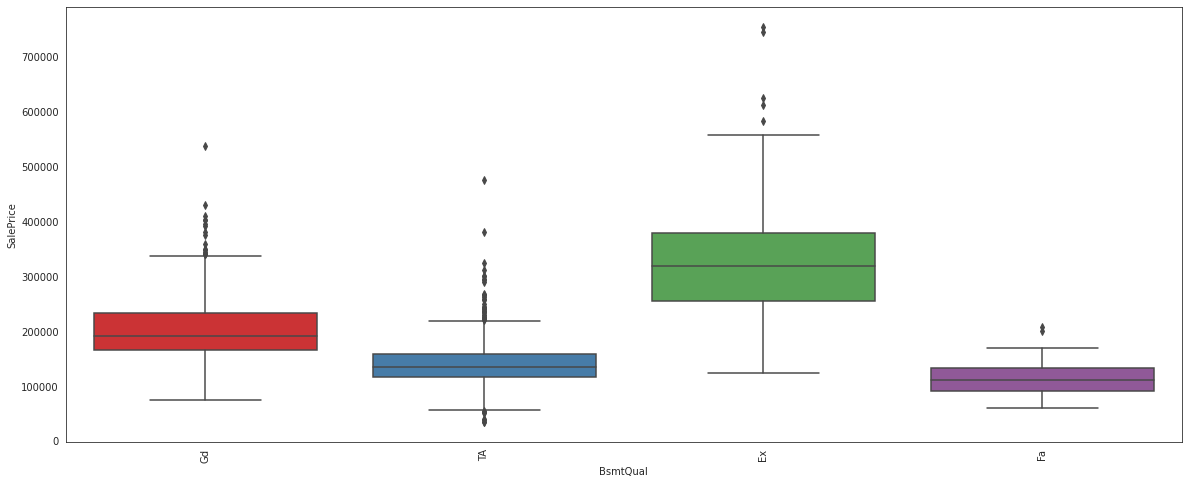

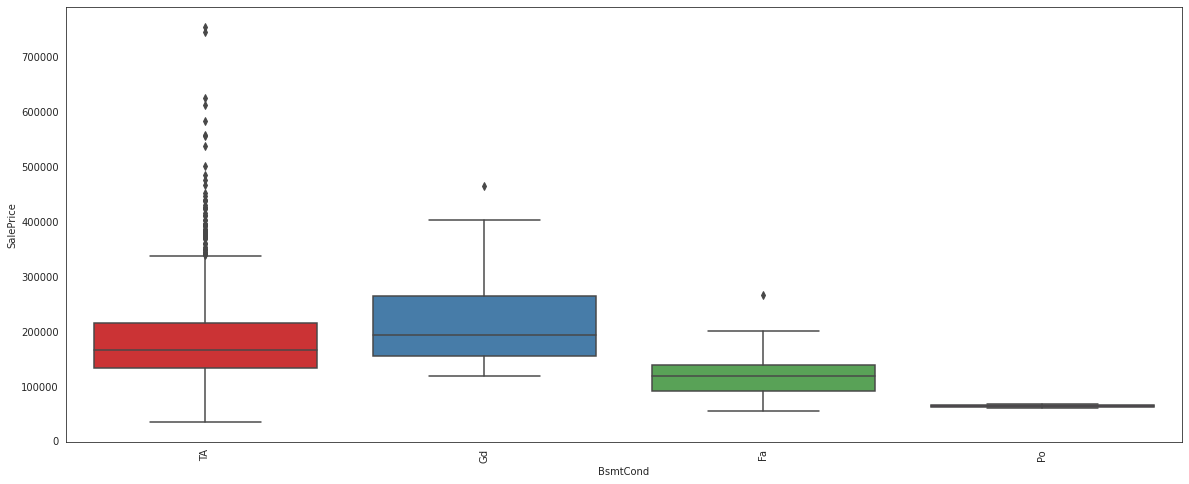

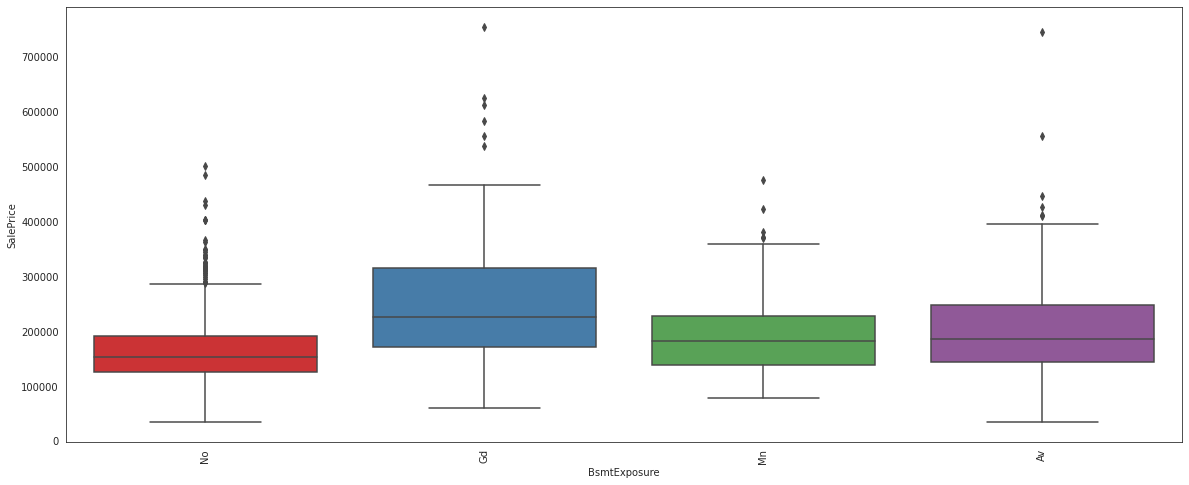

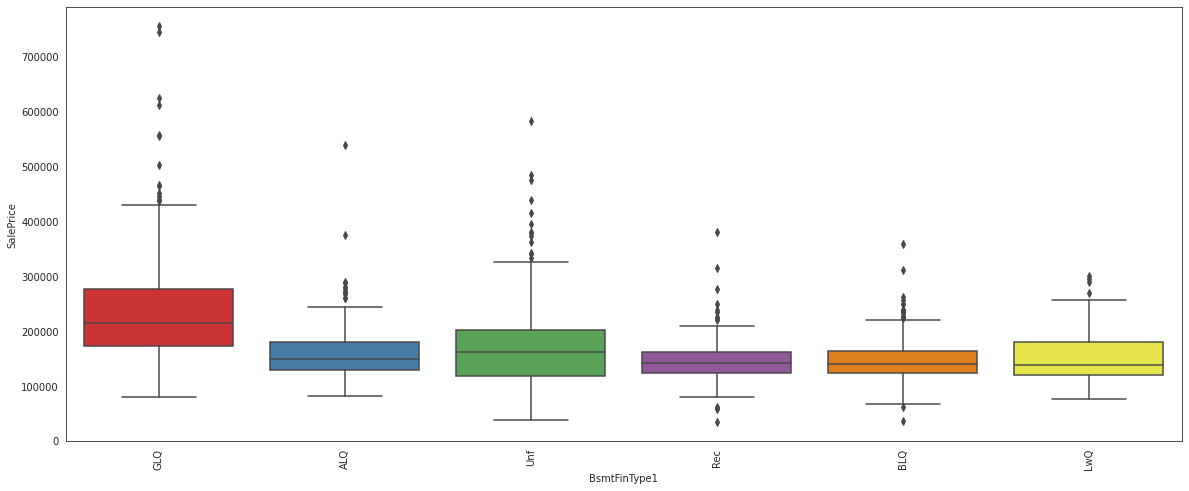

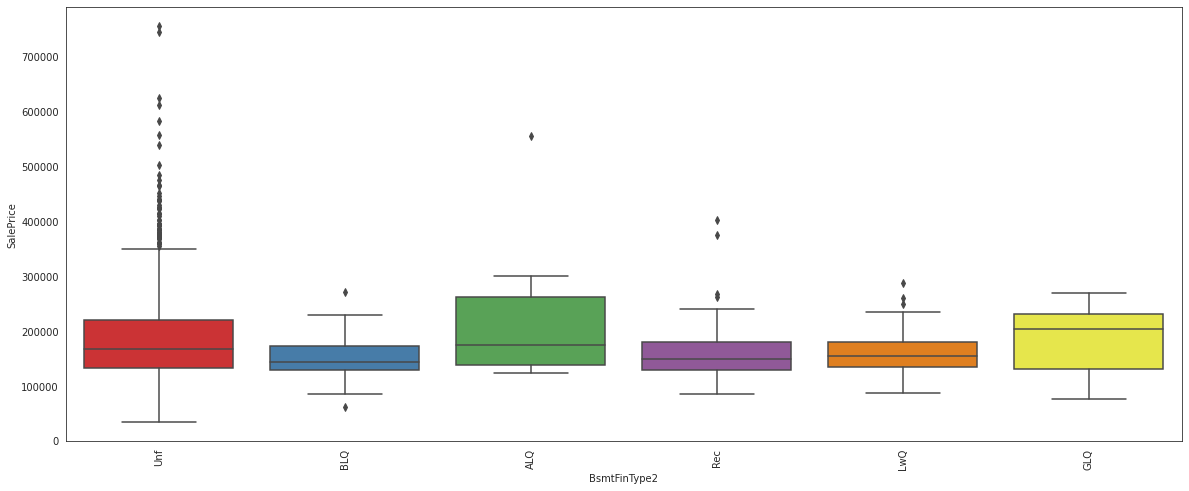

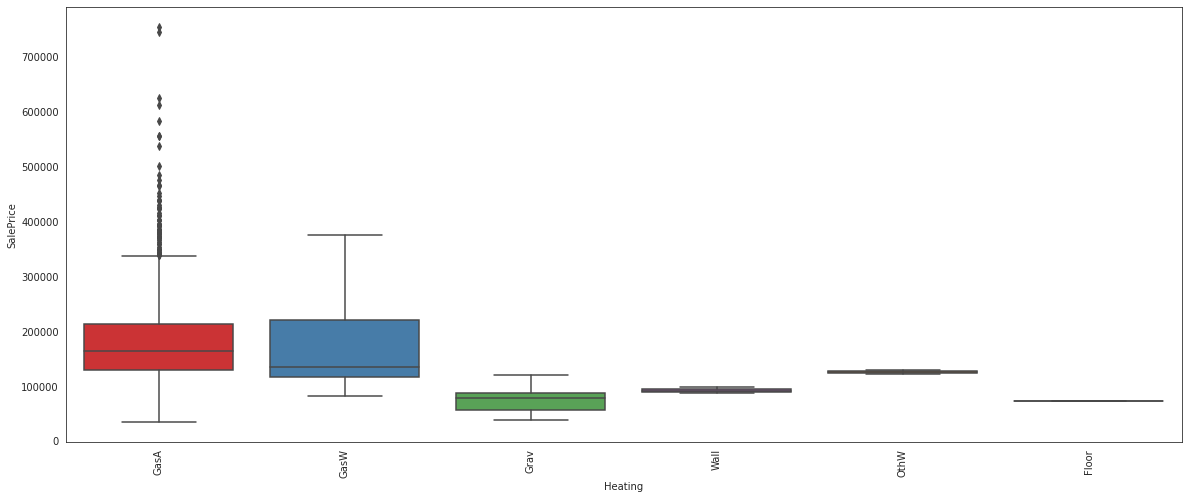

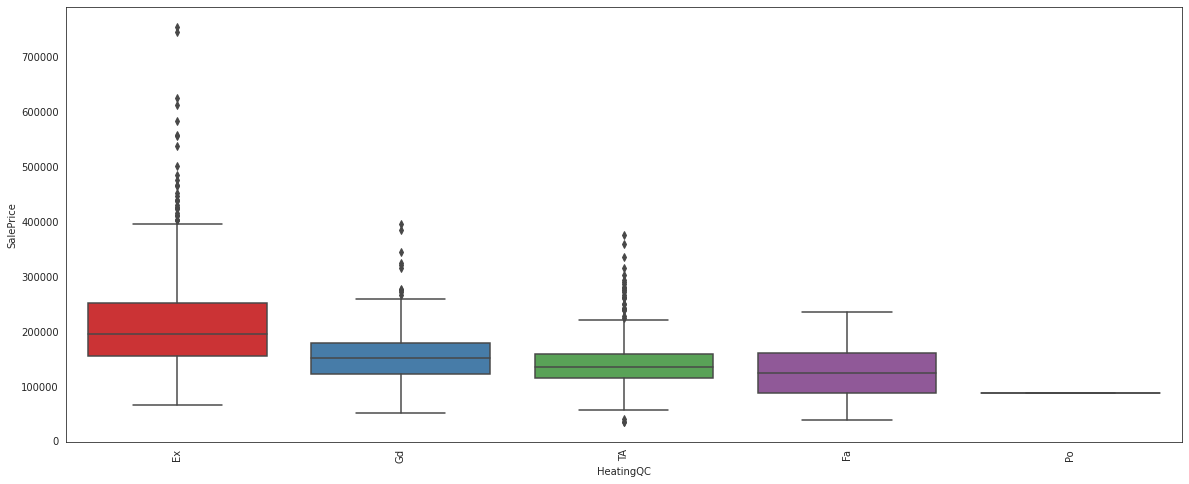

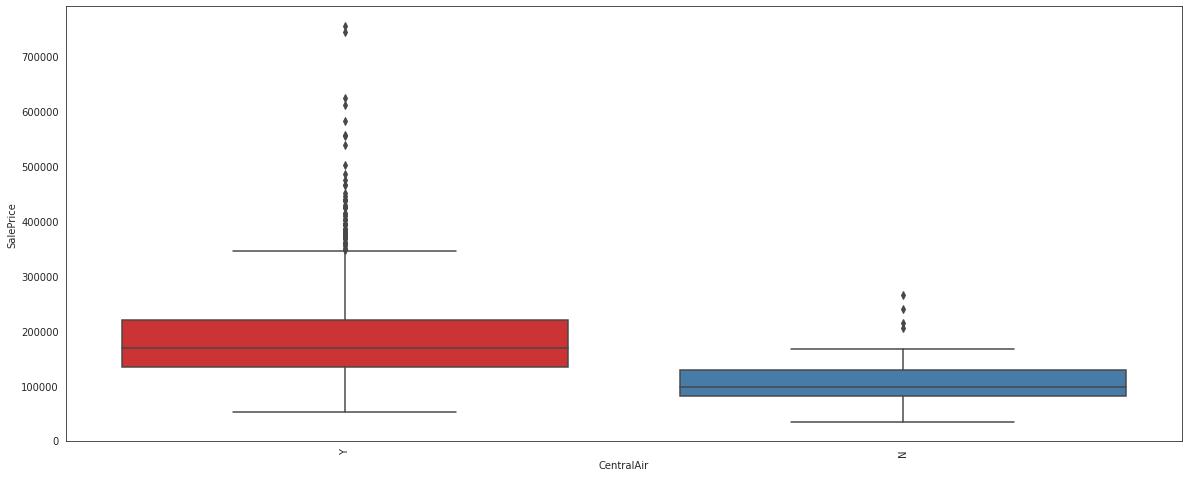

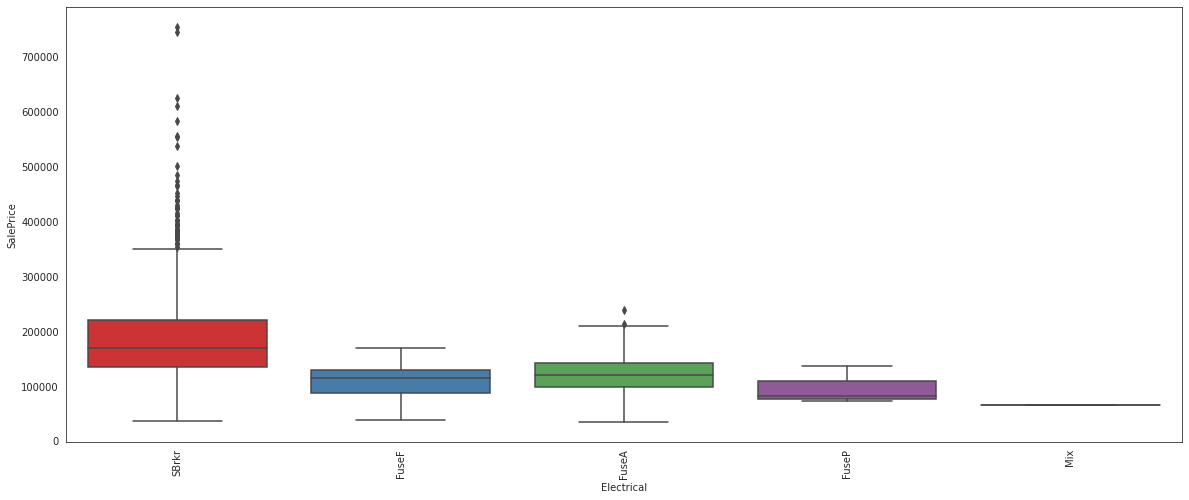

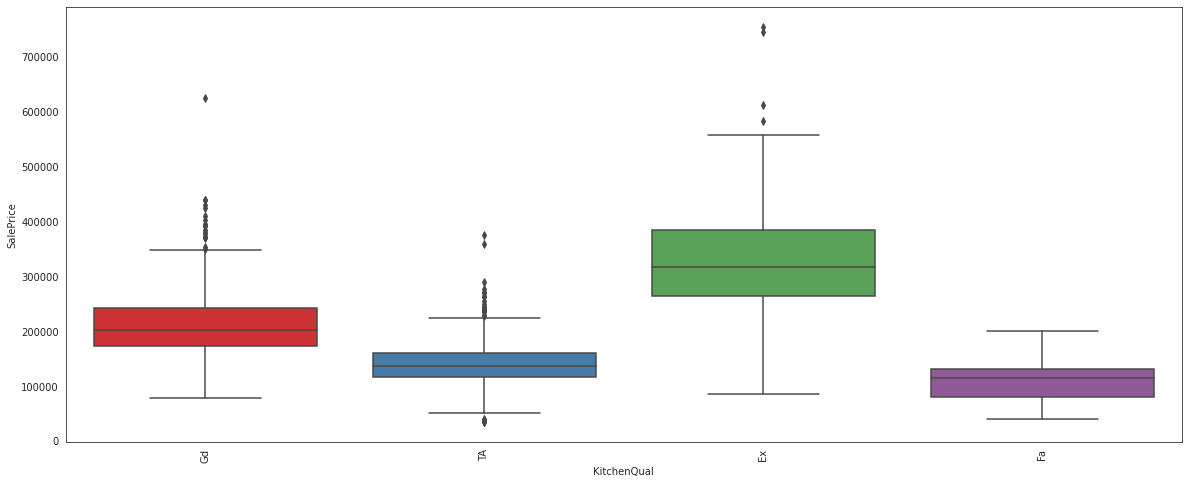

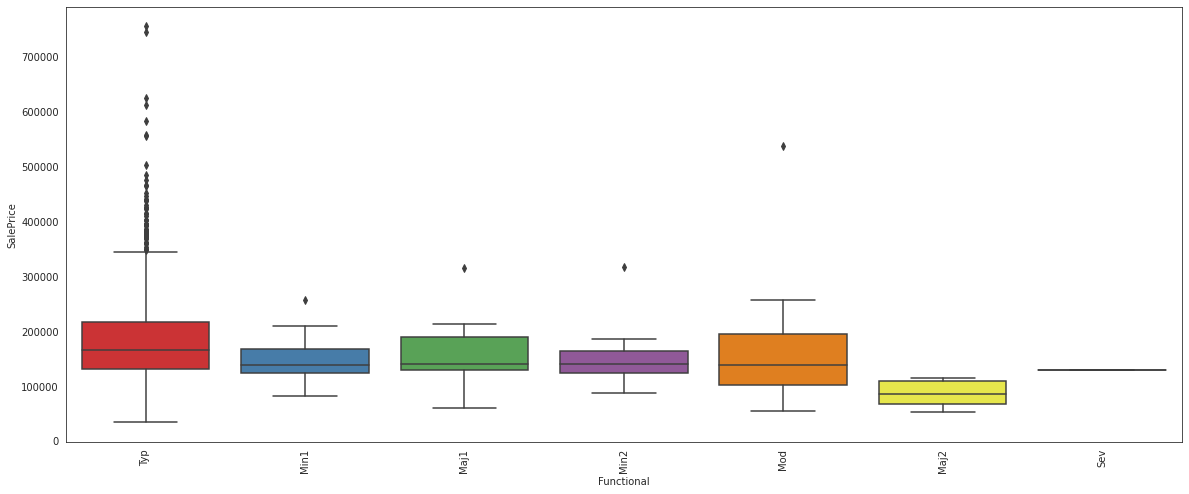

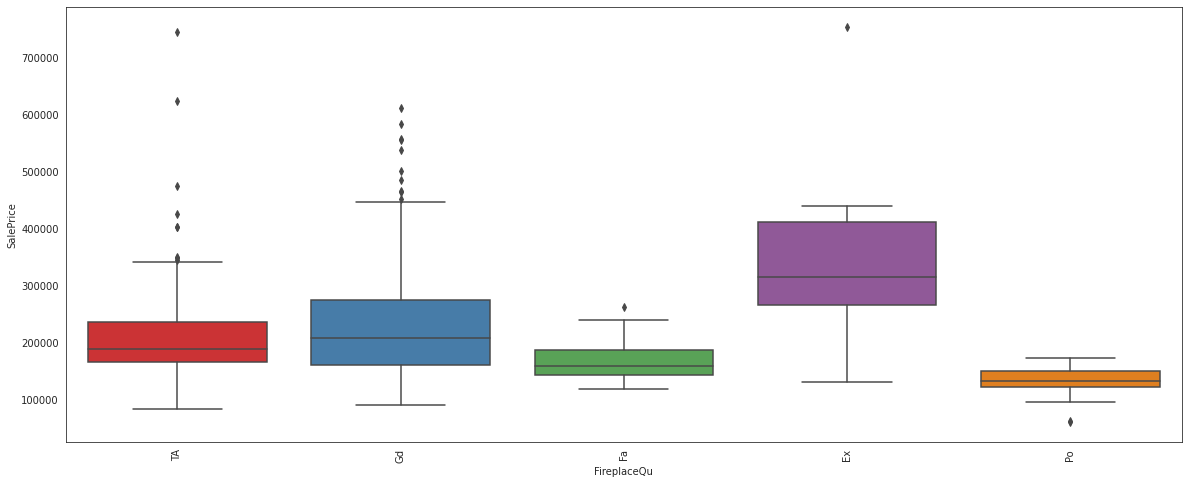

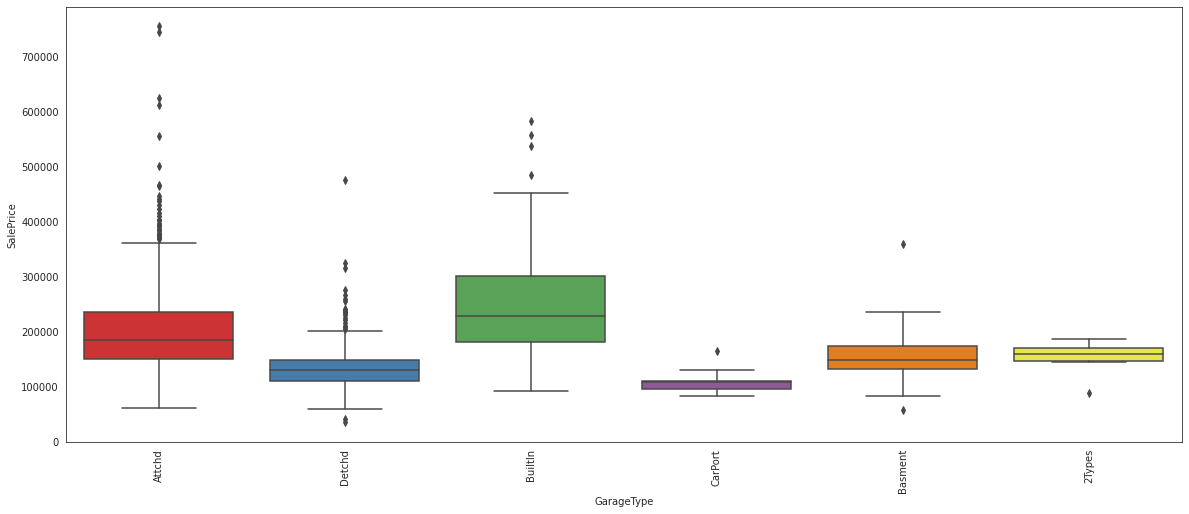

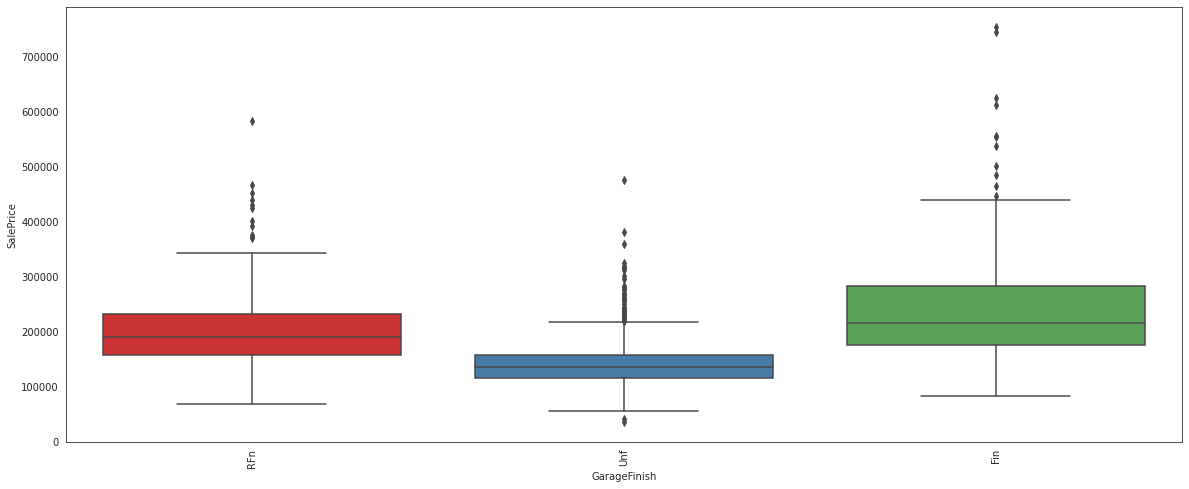

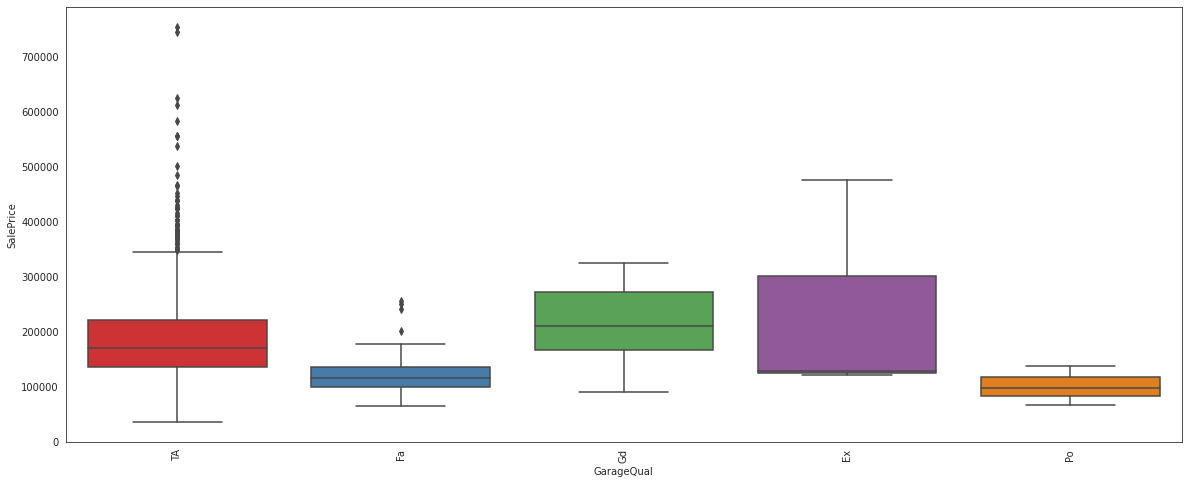

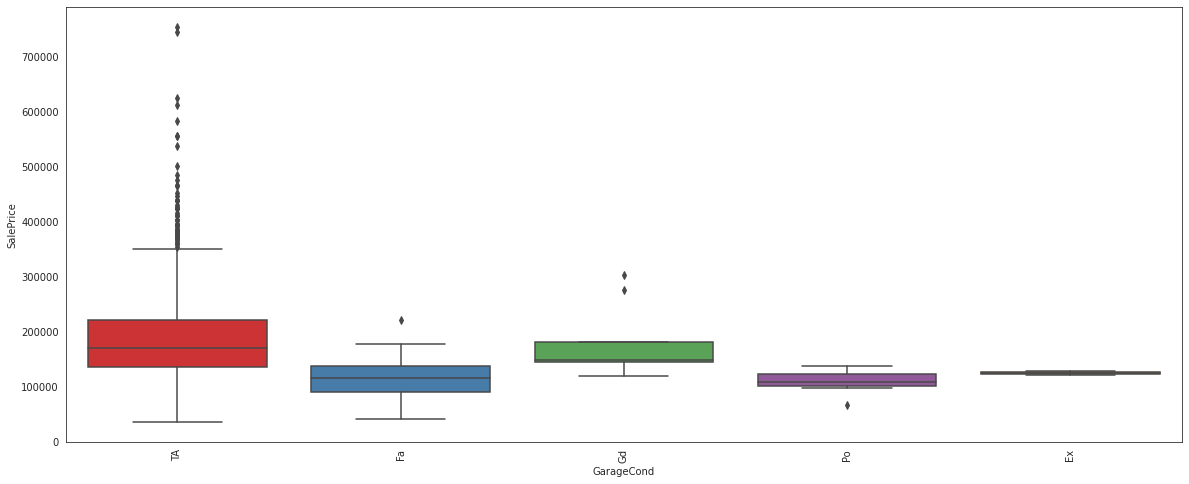

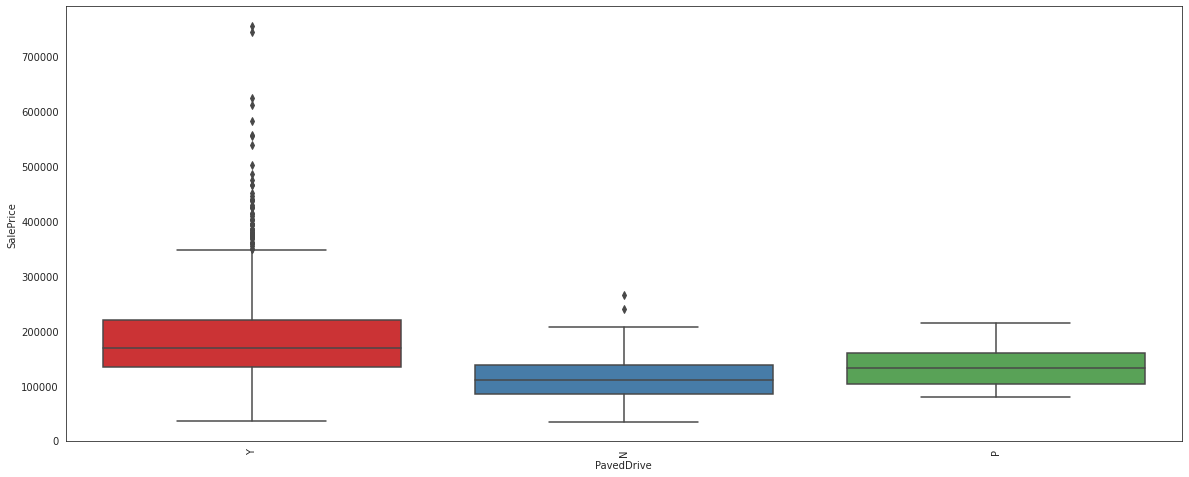

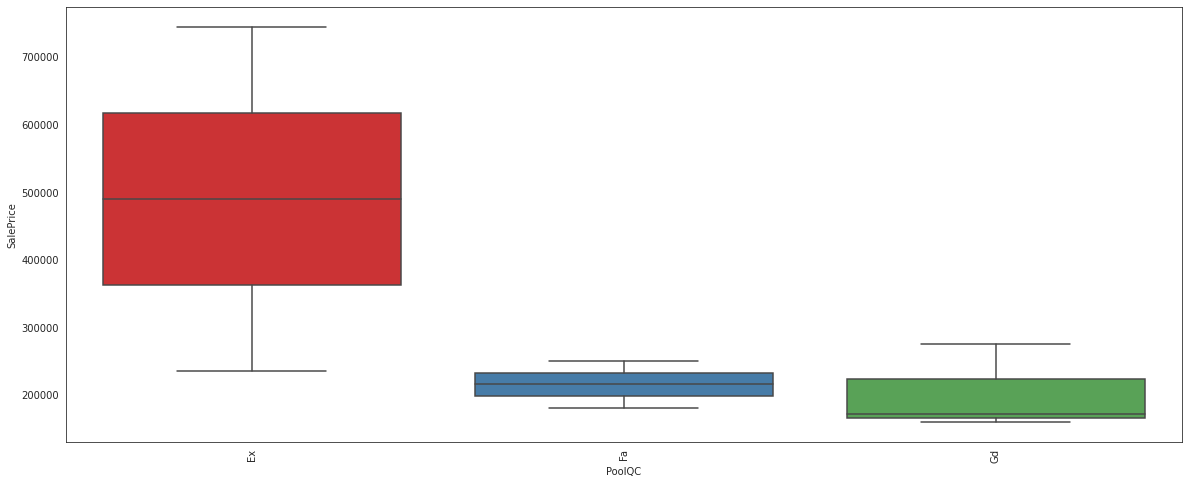

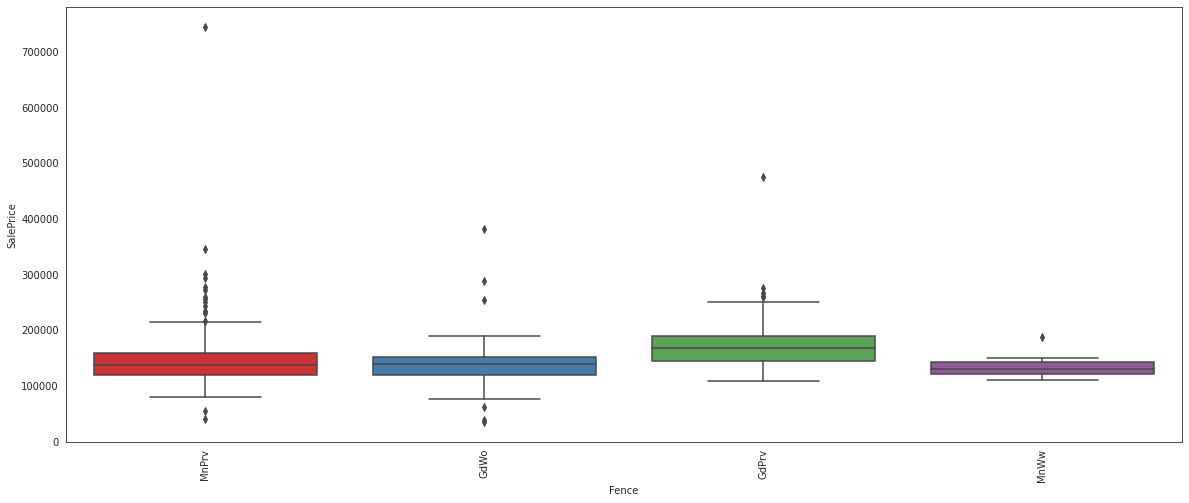

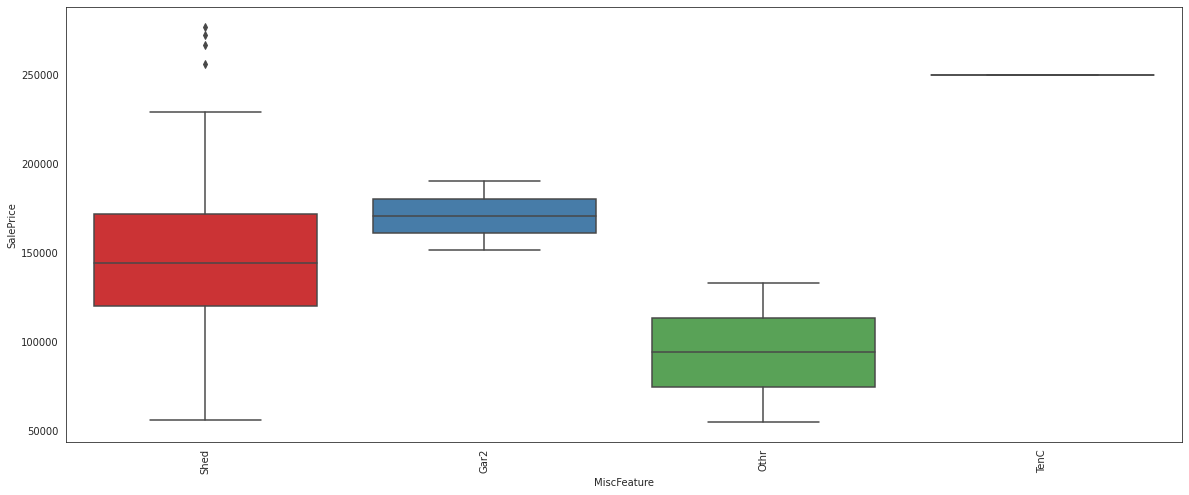

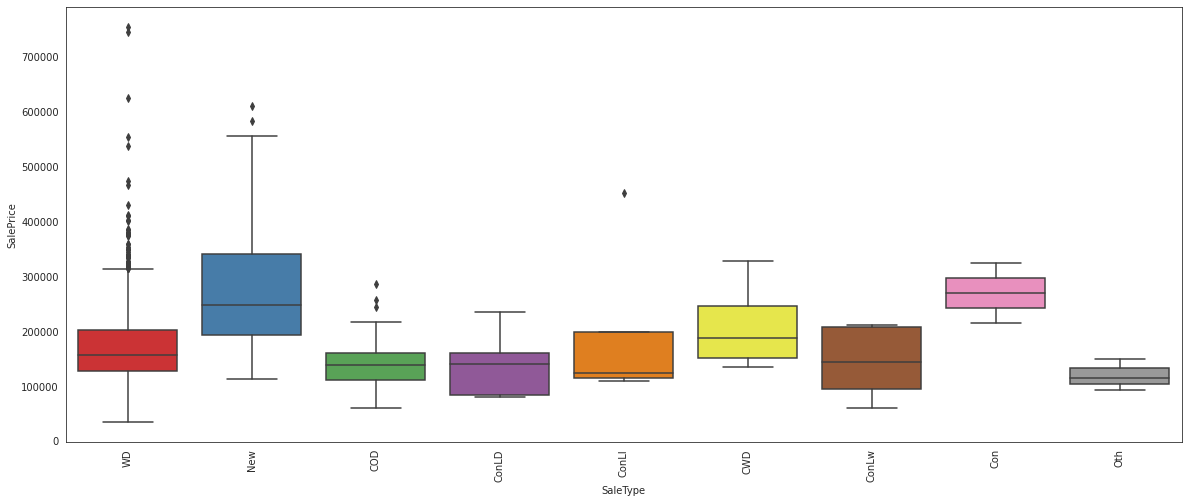

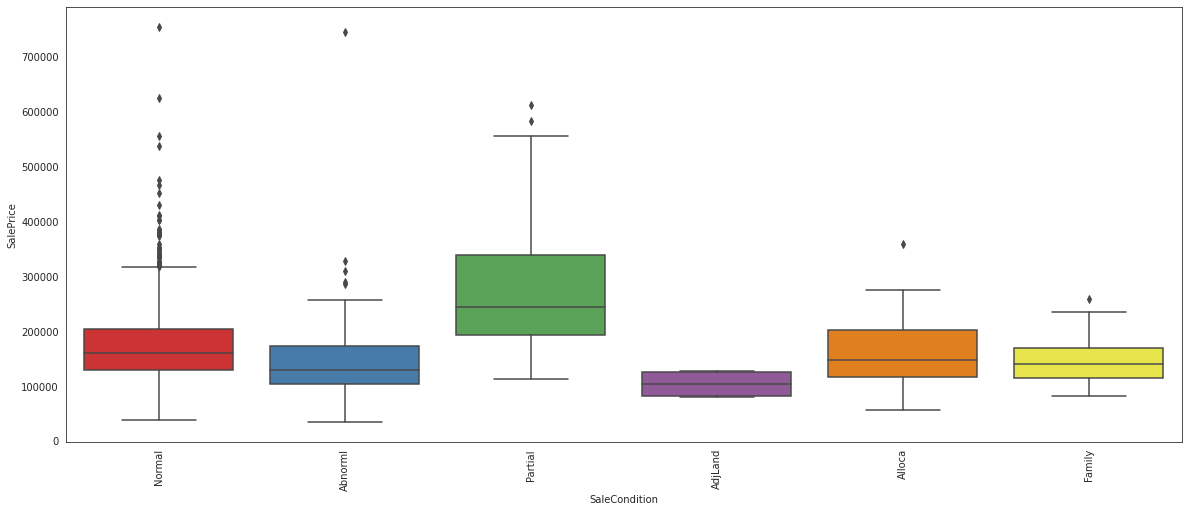

In [20]:
for num in num_cols:
    plot_num(train_df, num, 'SalePrice')

for cat in ord_cols + cat_cols:
    plot_cat(train_df, cat, 'SalePrice')

# Data Cleaning

## Dropping Redundant Columns

In [21]:
# From the above heatmaps, we can conclude that 'GarageArea', 'TotRmsAbvGrd', '1stFlrSF', and 'GarageYrBlt' are causing multicollinearity; so we'll drop them.
# Also 'Id' column is not necessary.

train_df.drop(['Id', 'GarageArea', 'TotRmsAbvGrd', '1stFlrSF', 'GarageYrBlt'], axis=1, inplace=True)
test_df.drop(['GarageArea', 'TotRmsAbvGrd', '1stFlrSF', 'GarageYrBlt'], axis=1, inplace=True)

## Dropping Null Columns and Values

In [22]:
# We'll drop the only row having null value for 'Electrical', and columns with null percentage greater than 15%;
# Namely: 'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', and 'LotFrontage'.
# Also, for the sake of simplicity, we'll drop columns associted with 'Garage' and 'Basement'.

all_drop = set(null_train[null_train['Quantity'] > 1].index.to_list())
sure_drop = set(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage'])

train_df.drop(train_df.loc[train_df['Electrical'].isnull()].index, inplace=True)
train_df.drop(sure_drop, axis=1, inplace=True)
test_df.drop(sure_drop, axis=1, inplace=True)


train_df_extra_dropped = train_df.drop(all_drop - sure_drop - {'GarageYrBlt'}, axis=1)
train_df_extra_dropped = train_df.drop(all_drop - sure_drop - {'GarageYrBlt'}, axis=1)